# Deep Neural Network

- At its core, a Deep Neural Network (DNN) is a type of Artificial Neural Network (ANN) characterized by having multiple layers of interconnected nodes (neurons) between the input and output layers.
- These intermediate layers are called "hidden layers.
- " The "deep" in DNN refers specifically to the presence of more than one hidden layer (often many more).
- Standard ANN as having an input layer, perhaps one hidden layer, and an output layer.
- DNN extends this by stacking multiple hidden layers, allowing the network to learn increasingly complex patterns and representations of the data hierarchically.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization
from tensorflow.keras.models import Sequential


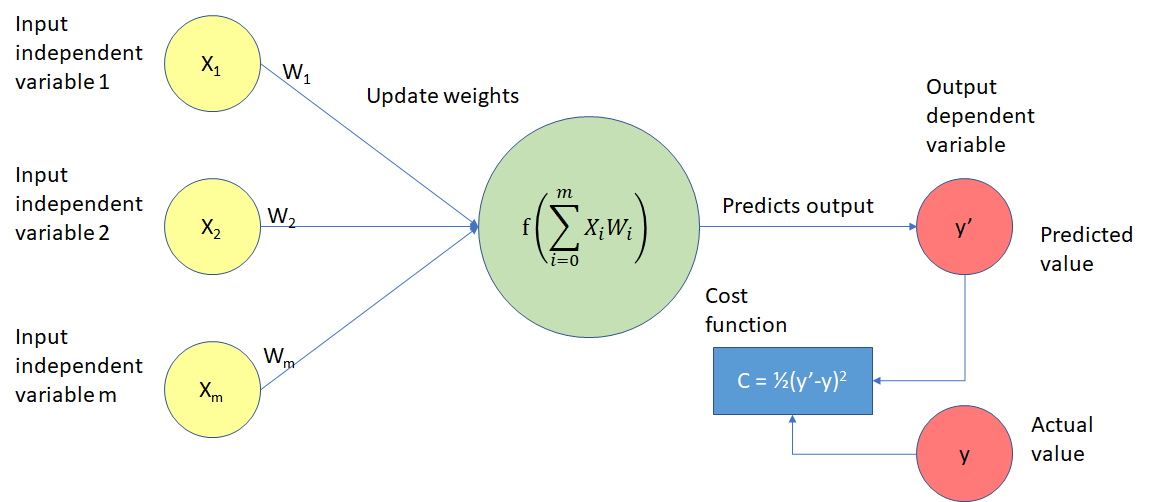

# Core Concepts



1.  **Neurons (Nodes/Units):** The fundamental processing units. Each neuron receives inputs from other neurons (or the initial data), performs a simple computation, and produces an output.

2.  **Layers:** Neurons are organized into layers:
    * **Input Layer:** Receives the raw input data (e.g., pixel values of an image, words in a sentence). The number of neurons usually corresponds to the number of features in the input data.
    * **Hidden Layers:** Layers between the input and output layers. These perform transformations on the data. In DNNs, there are multiple hidden layers. Early hidden layers might learn simple features (like edges in an image), while deeper layers combine these to learn more complex features (like shapes, objects, or abstract concepts).
    * **Output Layer:** Produces the final result (e.g., a classification probability, a numerical prediction). The structure depends on the task (e.g., one neuron for regression, multiple neurons with softmax activation for multi-class classification).

3.  **Connections & Weights:** Neurons in one layer are typically connected to neurons in the next layer. Each connection has an associated weight ($w$). This weight signifies the strength or importance of the connection. Higher weights mean the input from that connection has more influence.

4.  **Biases:** Each neuron (usually excluding the input layer) also has a bias term ($b$). The bias acts like an offset, allowing the neuron's activation function to be shifted left or right, making it easier for the model to learn patterns.

5.  **Activation Functions:** After a neuron calculates the weighted sum of its inputs plus its bias, this sum is passed through an activation function ($f$). This function introduces non-linearity into the network, which is crucial. Without non-linearity, a deep network would mathematically collapse into a single linear transformation, unable to model complex real-world data. Common activation functions include:
    * **ReLU (Rectified Linear Unit):** $f(x) = max(0, x)$. Very popular, computationally efficient, **helps mitigate vanishing gradients**.
    * **Sigmoid:** $f(x) = \frac{1}{1 + e^{-x}}$. Squashes values between 0 and 1. Often used in output layers for binary classification. Prone to vanishing gradients in deep networks.
    * **Tanh (Hyperbolic Tangent):** $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$. Squashes values between -1 and 1. Also **prone to vanishing gradients.**
    * **Softmax:** Used typically in the output layer for multi-class classification. Converts neuron outputs into probability distributions (summing to 1).

## Forward Propogation

The blue circles are the neurons. Each neuron has weight,bias and activation function. Input is fed to the input layer. The neuron then performs a linear transformation on the input by the weights and biases. The non linear transformation is done by the activation function.The information moves from input layer to hidden layer. Hidden layer would do the processing and gives output. This mechanism is forward propagation.



![image.png](attachment:image.png)

## What if the output generated is far away from the expected value?

In neural network, we would update the weights and biases of the neurons on the biases of error. This process is known as back propagation. Once the entire data has gone through this process, final weights and biases are used for predictions.



## Vanishing gradients

Generally, adding more number of hidden layers in the network will allows it to learn more complex functions, thus it performs well

But, here comes the problem, when we do back propagation i.e., calculating and updating the weights in backward direction,the gradients tends to get smaller and smaller as we keep on moving backwards in the network. This means the weights of the neurons in the earlier layers learn very slowly or sometimes they won’t change at all .But earlier layers in the network are much important because they are responsible for detecting simple patterns. If the earlier layers give inappropriate results,then how can we expect our model to perform well in later layers. This problem is called vanishing gradient problem.



## Exploding gradients

We know that, when we have more number of hidden layers, our model tends to perform well. When we do back propagation, if the gradients become larger and larger, then the weights of the neurons in the earlier stages change much. We know that the earlier layers are much important. Because of this larger weights, the neurons in the earlier layers will give inappropriate results. This problem is called exploding gradients problem.



# How DNNs Learn (The Training Process)


1.  **Forward Propagation:** Input data is fed into the input layer. It then passes through the network layer by layer. At each neuron, the **weighted sum of inputs plus bias is calculated and passed through the activation function**. This process continues until the output layer produces a prediction.

2.  **Loss Function (Cost Function):** A function measures **how far the network's prediction is from the actual target **(ground truth) in the training data. The goal of training is to minimize this loss. Examples:
    * **Mean Squared Error (MSE):** Common for regression tasks. $L = \frac{1}{N} \sum_{i=1}^{N} (y_{true}^{(i)} - y_{pred}^{(i)})^2$
    * **Cross-Entropy Loss:** Common for classification tasks. Measures the divergence between the predicted probability distribution and the true distribution.

3.  **Backpropagation:** This is the core algorithm for training DNNs. It **calculates the gradient (partial derivative) of the loss function with respect to each weight and bias in the network**. It works by propagating the error signal backward from the output layer to the input layer, using the **chain rule of calculus to determine how much each parameter contributed to the overall error**.

4.  **Optimization (Gradient Descent):** Based on the gradients calculated by backpropagation, an optimization algorithm updates the weights and biases to minimize the loss function. The **most basic form is Gradient Descent, where parameters are adjusted in the opposite direction of their gradient**. Common, more advanced optimizers include:
    * **Stochastic Gradient Descent (SGD):** Updates parameters using only a small batch of data at a time, making training faster and potentially avoiding local minima.
    * **Adam (Adaptive Moment Estimation):** An adaptive learning rate optimization algorithm that computes individual learning rates for different parameters. Often a **good default choice**.
    * **RMSprop:** Another adaptive learning rate method.
    
5.  **Epochs & Iterations:** Training involves iterating through the dataset multiple times (epochs). In each epoch, the data is typically divided into smaller batches, and weights are updated after processing each batch (iteration).

# Pros of DNNs

1.  **Automatic Feature Extraction:** DNNs can automatically learn relevant features from raw data, reducing the need for extensive manual feature engineering, which was a major bottleneck in traditional machine learning. Deeper layers learn increasingly abstract and complex features.

2.  **State-of-the-Art Performance:** They have achieved groundbreaking results and are the leading approach for many complex tasks, especially in computer vision (image recognition, object detection), natural language processing (machine translation, sentiment analysis), and speech recognition.

3.  **Modeling Complex Non-linearities:** The combination of depth and non-linear activation functions allows DNNs to approximate highly complex, non-linear relationships in data.

4.  **Transfer Learning:** Models trained on large datasets (e.g., ImageNet) can be adapted (fine-tuned) for new, related tasks with smaller datasets, saving significant training time and resources.

# Cons of DNNs

1.  **Data Hungry:** They typically require large amounts of labeled training data to perform well and avoid overfitting.

2.  **Computationally Expensive:** Training DNNs, especially very deep ones, requires significant computational power (often GPUs or TPUs) and can take a long time (hours, days, or even weeks).

3.  **"Black Box" Problem:** It can be very difficult to understand precisely *why* a DNN makes a specific prediction. The complex interplay of millions of parameters makes interpretability a major challenge.

4.  **Hyperparameter Tuning:** Performance is highly sensitive to architectural choices (number of layers, neurons per layer), activation functions, learning rates, optimizers, regularization techniques, etc. Finding the optimal combination often requires extensive experimentation.

5.  **Overfitting:** DNNs have a large number of parameters, making them prone to overfitting – learning the training data too well, including its noise, and failing to generalize to new, unseen data. Regularization techniques (like Dropout, L1/L2 regularization, Batch Normalization) are needed to combat this.

6.  **Vanishing/Exploding Gradients:** In very deep networks, gradients calculated during backpropagation can become extremely small (vanish) or extremely large (explode), hindering effective learning. Techniques like careful weight initialization, ReLU activation, Batch Normalization, and residual connections (ResNets) help mitigate this.

# Mathematics Behind DNNs

The core mathematics involves concepts from:

1.  **Linear Algebra:**
    * **Vectors:** Represent inputs, outputs, and activations within a layer.
    * **Matrices:** Represent the weights connecting layers.
    * **Matrix Multiplication:** The core operation for calculating the weighted sum of inputs ($z = Wx + b$, where $W$ is the weight matrix, $x$ is the input vector, $b$ is the bias vector, and $z$ is the pre-activation output vector).

2.  **Calculus:**
    * **Derivatives/Partial Derivatives:** Essential for calculating gradients. The gradient tells us how a small change in a weight or bias will affect the loss function.
    * **Chain Rule:** The fundamental mechanism behind backpropagation. It allows us to calculate the gradient of the loss with respect to parameters in earlier layers by recursively applying the chain rule through all the intermediate functions (activations and weighted sums).
    ![image.png](attachment:image.png)
    * **Gradient Descent:** The optimization process itself is based on calculus, using the gradient to iteratively update parameters: ![image-2.png](attachment:image-2.png)
    is the learning rate.

3.  **Probability and Statistics:**
    * **Loss Functions:** Often derived from probabilistic principles (e.g., Cross-Entropy relates to maximum likelihood estimation).
    * **Activation Functions:** Some activation functions (like Softmax) output probabilities.
    * **Initialization:** Weights are often initialized randomly using specific statistical distributions to break symmetry and improve training dynamics.
    * **Regularization:** Techniques like Dropout have probabilistic interpretations.
    * **Evaluation Metrics:** Statistical measures (accuracy, precision, recall, F1-score, AUC) are used to evaluate model performance.

# Weight Initalization

Weight initialization is a crucial step in training Deep Neural Networks (DNNs). It sets the initial values of the weights in the network's layers before training begins. The choice of initialization method can significantly impact the learning process, affecting the speed of convergence and the final performance of the model. Poor initialization can lead to problems like vanishing or exploding gradients, preventing the network from learning effectively.



In [ ]:
from tensorflow.keras.initializers import (Zeros, RandomNormal, RandomUniform,
                                           TruncatedNormal, GlorotNormal, GlorotUniform,
                                           HeNormal, HeUniform, LecunNormal, LecunUniform,
                                           Orthogonal, Constant, Identity)


## Zero Initialization

**Concept**: All weights are initialized to zero.
**Problem**: This leads to symmetry in the network. If all weights in a layer start with the same value, all neurons in that layer will compute the same output and have the same gradients during backpropagation. This means they will learn the same features, making the network redundant.


In [ ]:
import numpy as np

def zero_initialization(layer_dims):
  """
  Initializes weights and biases to zero.

  Args:
    layer_dims: A list containing the dimensions of each layer in the network.

  Returns:
    A dictionary containing the initialized weights ("W1", "W2", ...) and biases ("b1", "b2", ...).
  """
  parameters = {}
  L = len(layer_dims)  # Number of layers in the network

  for l in range(1, L):
    parameters['W' + str(l)] = np.zeros((layer_dims[l], layer_dims[l - 1]))
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
  return parameters

# Example usage:
layer_dimensions = [784, 128, 10] # Input layer (784), hidden layer (128), output layer (10)
parameters = zero_initialization(layer_dimensions)
print("Weights in the first layer (Zero Initialization):\n", parameters['W1'])

In [ ]:
model = Sequential([
    # Zero initialization
    Dense(64, activation='relu', kernel_initializer=Zeros(), input_shape=(784,))
])



## Random Initialization

* **Concept:** Weights are initialized to small random values.
* **Problem:** If the random values are **too large, it can lead to exploding gradients**. If they are **too small, it can lead to vanishing gradients**, especially in deep networks.


In [ ]:
import numpy as np

def random_initialization(layer_dims, scale=0.01):
  """
  Initializes weights to small random values and biases to zero.

  Args:
    layer_dims: A list containing the dimensions of each layer.
    scale: A scaling factor for the random values (e.g., 0.01).

  Returns:
    A dictionary containing the initialized weights and biases.
  """
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * scale
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
  return parameters

# Example usage:
layer_dimensions = [784, 128, 10]
parameters = random_initialization(layer_dimensions)
print("Weights in the first layer (Random Initialization):\n", parameters['W1'])

-> Random normal initialization (mean=0, stddev=0.05)
    Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0., stddev=0.05)),
-> Random uniform initialization (values between -0.05 and 0.05)
    Dense(64, activation='relu', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05)),
->Truncated normal initialization (values within 2 standard deviations)
    Dense(64, activation='relu', kernel_initializer=TruncatedNormal(mean=0., stddev=0.05)),

## Xavier/Glorot Initialization

* **Concept:** Aims to **keep the variance of the activations roughly the same across all layers**. It considers the number of input and output neurons in a layer.
* **Formula for Weights:**
    * For sigmoid and tanh activation functions:
        * Variance of weights =  `1 / n_in` (where `n_in` is the number of input neurons)
        * Variance of weights =  `1 / n_out` (where `n_out` is the number of output neurons)
        * A common approach is to take the average: Variance of weights = `2 / (n_in + n_out)`
    * Weights are sampled from a uniform distribution: `U(-sqrt(6 / (n_in + n_out)), sqrt(6 / (n_in + n_out)))`
    * Or from a normal distribution with standard deviation: `sqrt(2 / (n_in + n_out))`

In [ ]:
import numpy as np

def xavier_initialization(layer_dims):
  """
  Initializes weights using Xavier/Glorot initialization and biases to zero.

  Args:
    layer_dims: A list containing the dimensions of each layer.

  Returns:
    A dictionary containing the initialized weights and biases.
  """
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):
    n_in = layer_dims[l - 1]
    n_out = layer_dims[l]
    stddev = np.sqrt(2 / (n_in + n_out))
    parameters['W' + str(l)] = np.random.randn(n_out, n_in) * stddev
    parameters['b' + str(l)] = np.zeros((n_out, 1))
  return parameters

# Example usage:
layer_dimensions = [784, 128, 10]
parameters = xavier_initialization(layer_dimensions)
print("Weights in the first layer (Xavier Initialization):\n", parameters['W1'])

-> Glorot (Xavier) normal initialization (recommended for sigmoid/tanh)
    Dense(64, activation='relu', **kernel_initializer**=GlorotNormal()),

-> Glorot (Xavier) uniform initialization
    Dense(64, activation='relu', **kernel_initializer**=GlorotUniform()),

## He/Kaiming Initialization - Preferrable

* **Concept:** Designed specifically for ReLU (Rectified Linear Unit) and its variants. It focuses on maintaining the variance of the activations in the forward pass.
* **Formula for Weights:**
    * For ReLU activation functions:
        * Variance of weights = `2 / n_in` (where `n_in` is the number of input neurons)
    * Weights are sampled from a normal distribution with standard deviation: `sqrt(2 / n_in)`
    * Or from a uniform distribution: `U(-sqrt(6 / n_in), sqrt(6 / n_in))`

-> He normal initialization (recommended for ReLU)
    Dense(64, activation='relu', kernel_initializer=HeNormal()),

-> He uniform initialization
    Dense(64, activation='relu', kernel_initializer=HeUniform()),

In [ ]:
import numpy as np

def he_initialization(layer_dims):
  """
  Initializes weights using He/Kaiming initialization and biases to zero.

  Args:
    layer_dims: A list containing the dimensions of each layer.

  Returns:
    A dictionary containing the initialized weights and biases.
  """
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):
    n_in = layer_dims[l - 1]
    n_out = layer_dims[l]
    stddev = np.sqrt(2 / n_in)
    parameters['W' + str(l)] = np.random.randn(n_out, n_in) * stddev
    parameters['b' + str(l)] = np.zeros((n_out, 1))
  return parameters

# Example usage:
layer_dimensions = [784, 128, 10]
parameters = he_initialization(layer_dimensions)
print("Weights in the first layer (He Initialization):\n", parameters['W1'])

## LeCun Initialization (Less Common Now)

* **Concept:** An earlier initialization method, similar in spirit to Xavier but specifically proposed for tanh activation functions.
* **Formula for Weights:**
    * Variance of weights = `1 / n_in`
    * Weights are sampled from a normal distribution with standard deviation: `sqrt(1 / n_in)`

-> LeCun normal initialization
    Dense(64, activation='relu', kernel_initializer=LecunNormal()),

-> LeCun uniform initialization
    Dense(64, activation='relu', kernel_initializer=LecunUniform()),

-> Orthogonal initialization (useful for recurrent networks)
    Dense(64, activation='relu', kernel_initializer=Orthogonal()),

-> Constant initialization (initialize all weights to a specific value)
    Dense(64, activation='relu', kernel_initializer=Constant(value=1.0)),

-> Identity initialization (for specific use cases, like initializing the weights of a layer to an identity matrix)
    Dense(10, activation='softmax', kernel_initializer=Identity())

## Choosing the Right Initialization

* **ReLU and its variants (Leaky ReLU, etc.):** He/Kaiming initialization is generally recommended.
* **Sigmoid and Tanh:** Xavier/Glorot initialization is often a good choice.
* **For simple networks or as a baseline:** Small random initialization might work, but be mindful of the scale.
* **Avoid Zero Initialization:** It almost always leads to issues with symmetry breaking.

## Sample code for Weight Initalization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import (Zeros, RandomNormal, RandomUniform,
                                           TruncatedNormal, GlorotNormal, GlorotUniform,
                                           HeNormal, HeUniform, LecunNormal, LecunUniform,
                                           Orthogonal, Constant, Identity)

# Example Sequential model
model = Sequential([
    # Zero initialization
    Dense(64, activation='relu', kernel_initializer=Zeros(), input_shape=(784,)),

    # Random normal initialization (mean=0, stddev=0.05)
    Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0., stddev=0.05)),

    # Random uniform initialization (values between -0.05 and 0.05)
    Dense(64, activation='relu', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05)),

    # Truncated normal initialization (values within 2 standard deviations)
    Dense(64, activation='relu', kernel_initializer=TruncatedNormal(mean=0., stddev=0.05)),

    # Glorot (Xavier) normal initialization (recommended for sigmoid/tanh)
    Dense(64, activation='relu', kernel_initializer=GlorotNormal()),

    # Glorot (Xavier) uniform initialization
    Dense(64, activation='relu', kernel_initializer=GlorotUniform()),

    # He normal initialization (recommended for ReLU)
    Dense(64, activation='relu', kernel_initializer=HeNormal()),

    # He uniform initialization
    Dense(64, activation='relu', kernel_initializer=HeUniform()),

    # LeCun normal initialization
    Dense(64, activation='relu', kernel_initializer=LecunNormal()),

    # LeCun uniform initialization
    Dense(64, activation='relu', kernel_initializer=LecunUniform()),

    # Orthogonal initialization (useful for recurrent networks)
    Dense(64, activation='relu', kernel_initializer=Orthogonal()),

    # Constant initialization (initialize all weights to a specific value)
    Dense(64, activation='relu', kernel_initializer=Constant(value=1.0)),

    # Identity initialization (for specific use cases, like initializing the weights of a layer to an identity matrix)
    Dense(10, activation='softmax', kernel_initializer=Identity())
])

# Build the model (important to see the effect of initialization)
model.build(input_shape=(None, 784))
model.summary()

# You can inspect the initial weights of a layer
print("\nInitial weights of the first layer:")
print(model.layers[0].get_weights()[0])

# Activation Function

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns in the data. Without non-linear activation functions, a DNN would essentially be a linear regression model, regardless of its depth.

## Sigmoid Function: output Layer & binary classification - Ranges 0 to 1

* **Formula:** σ(x) = 1 / (1 + exp(-x))
* **Pros:**
    * Output range is between 0 and 1, which can be interpreted as a probability, making it useful for binary classification in the output layer.
    * The function is differentiable, which is essential for backpropagation.
* **Cons:**
    * **Vanishing Gradient Problem:** For very high or very low input values, the gradient of the sigmoid function becomes very close to zero. This can slow down or even stop the learning process in deep networks, as the gradients propagated backward become extremely small.
    * **Not Zero-Centered:** The output is always positive (between 0 and 1), which can lead to issues during gradient updates.
    * **Computationally Expensive:** The exponential operation can be relatively slow.
* **When to Use:** Primarily in the output layer for binary classification problems.
* Gradient values of sigmoid range between 0 and 0.25

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

![image.png](attachment:image.png)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

# Using in a Dense layer
layer = tf.keras.layers.Dense(units=1, activation='sigmoid')

# Alternatively, using the Activation layer
layer = tf.keras.layers.Dense(units=1)
output = Activation('sigmoid')(layer.output)

## Tanh (Hyperbolic Tangent) Function - Range -1, 1

* **Formula:** tanh(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x)) = 2σ(2x) - 1
* **Pros:**
    * Output range is between -1 and 1, which makes it zero-centered. This can help with faster convergence compared to sigmoid.
    * Also differentiable.
* **Cons:**
    * **Vanishing Gradient Problem:** Similar to sigmoid, tanh also suffers from the vanishing gradient problem for very high or very low input values.
    * **Computationally Expensive:** Involves exponential operations.
* **When to Use:** Historically used in hidden layers, especially in Recurrent Neural Networks (RNNs). However, ReLU and its variants are more commonly used now.
* Gradient values of tanh range between 0 and 1.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

# Using in a Dense layer
layer = tf.keras.layers.Dense(units=64, activation='tanh')

# Alternatively, using the Activation layer
layer = tf.keras.layers.Dense(units=64)
output = Activation('tanh')(layer.output)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## ReLU (Rectified Linear Unit) Function

* **Formula:** ReLU(x) = max(0, x)
* **Pros:**
    * **Computationally Efficient:** Very simple operation (comparison and max), leading to faster computation.
    * **Alleviates Vanishing Gradient Problem:** For positive input values, the gradient is 1, which helps in propagating gradients effectively through multiple layers.
    * **Sparsity:** Can lead to sparse activations (some neurons output zero), which can be beneficial for learning representations.
* **Cons:**
    * **Dying ReLU Problem:** If a neuron's input is consistently negative, it will output 0, and its gradient will also be 0. This neuron effectively "dies" and stops contributing to the learning process.
    * **Not Zero-Centered:** The output is always non-negative.
* **When to Use:** The most common activation function for hidden layers in many types of neural networks.
* **Output Range**: (0, ∞)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

# Using in a Dense layer
layer = tf.keras.layers.Dense(units=64, activation='relu')

# Alternatively, using the Activation layer
layer = tf.keras.layers.Dense(units=64)
output = Activation('relu')(layer.output)

![image.png](attachment:image.png)

Graph for derivative of ReLU function

![image.png](attachment:image.png)

If the value of x is greater than zero, then the derivative of the ReLU(x) i.e., ReLU’(x)=1.

If the value of x is less than zero, then the derivative of the ReLU(x) i.e., ReLU’(x)=0.

![image.png](attachment:image.png)

## Leaky ReLU

* **Formula:** LeakyReLU(x) = x if x >= 0 else αx (where α is a small positive constant, e.g., 0.01)
* **Pros:**
    * Addresses the "dying ReLU" problem by allowing a small, non-zero gradient for negative inputs.
    * Computationally efficient.
* **Cons:**
    * The choice of α can impact performance and might require tuning.
    * Performance improvement over regular ReLU is not always consistent.
* **When to Use:** As an alternative to ReLU in hidden layers, especially if you suspect the "dying ReLU" problem might be occurring.
* **Output Range**: (-∞, ∞)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

# Using Leaky ReLU directly as an activation function
layer = tf.keras.layers.Dense(units=64, activation=LeakyReLU(alpha=0.01))

# Alternatively, using the Activation layer
layer = tf.keras.layers.Dense(units=64)
output = Activation(LeakyReLU(alpha=0.01))(layer.output)

![image.png](attachment:image.png)



If the value of x is greater than zero, then the Leaky ReLU(x)=x.

If the value of x is less than zero, then the Leaky ReLU(x)=0.01*x

Graph of derivative of Leaky ReLU function
- If the value of x >0, then the derivative of Leaky ReLU(x) i.e., Leaky ReLU’(x)=1.

- If the value of x <0, then the derivative of Leaky ReLU(x) i.e., Leaky ReLU’(x)=0.01.



![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Parametric ReLU - PReLU

* **Formula:** PReLU(x) = x if x >= 0 else αx (where α is a learnable parameter)
* **Pros:**
    * Similar to Leaky ReLU but the slope for negative inputs (α) is learned during training, potentially leading to better adaptation to the data.
* **Cons:**
    * Adds an extra parameter to learn for each neuron, which can increase the complexity of the model and the risk of overfitting on small datasets.
* **When to Use:** In hidden layers as an alternative to ReLU or Leaky ReLU when you want the network to learn the best slope for negative inputs.
* **Output Range**: (-∞, ∞)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import PReLU

# Using PReLU directly as an activation function
layer = tf.keras.layers.Dense(units=64, activation=PReLU())

# Alternatively, using the Activation layer
layer = tf.keras.layers.Dense(units=64)
output = Activation(PReLU())(layer.output)

## ELU (Exponential Linear Unit) - When Negative Activation needed

* **Formula:** ELU(x) = x if x >= 0 else α(exp(x) - 1) (where α is a positive constant, e.g., 1.0)
* **Pros:**
    * Addresses the "dying ReLU" problem.
    * Can produce negative outputs, which can help the network learn more robust representations.
    * Tends to have activations closer to zero mean.
* **Cons:**
    * Computationally more expensive than ReLU due to the exponential operation for negative inputs.
    * The choice of α can impact performance.
* **When to Use:** In hidden layers as an alternative to ReLU, especially in situations where you want negative activations.
* **Output Range**: (-α, ∞)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

# Using in a Dense layer
layer = tf.keras.layers.Dense(units=64, activation='elu')

# Alternatively, using the Activation layer
layer = tf.keras.layers.Dense(units=64)
output = Activation('elu')(layer.output)

## Swish

* **Formula:** Swish(x) = x * sigmoid(βx) (where β is a learnable parameter or a constant like 1)
* **Pros:**
    * Research has shown that Swish can sometimes outperform ReLU in deeper models.
    * The non-monotonic nature of Swish can encourage more complex representations.
* **Cons:**
    * Computationally slightly more expensive than ReLU due to the sigmoid operation.
* **When to Use:** In hidden layers of deeper networks as a potential replacement for ReLU.

* **Formula:** Swish(x) = x * sigmoid(βx) (where β is a learnable parameter or a constant like 1)
* **Pros:**
    * Research has shown that Swish can sometimes outperform ReLU in deeper models.
    * Smooth, non-monotonic nature of Swish can encourage more complex representations.
* **Cons:**
    * Computationally slightly more expensive than ReLU due to the sigmoid operation.
* **When to Use:** In hidden layers of deeper networks as a potential replacement for ReLU.
* **Output Range**: (-0.2785, ∞) approximately for β=1

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

# Define the Swish activation function
def swish(x):
  return x * tf.sigmoid(x) # Assuming beta=1

# Using in a Dense layer with a custom activation function
layer = tf.keras.layers.Dense(units=64, activation=swish)

# Alternatively, using the Activation layer with a custom function
layer = tf.keras.layers.Dense(units=64)
output = Activation(swish)(layer.output)

# For a learnable beta (often used in Swish-B)
class SwishBeta(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(SwishBeta, self).__init__(**kwargs)
        self.beta = self.add_weight(name='beta', shape=(1,), initializer='ones', trainable=True)

    def call(self, x):
        return x * tf.sigmoid(self.beta * x)

# Using SwishBeta
layer = tf.keras.layers.Dense(units=64)
output = SwishBeta()(layer.output)

## Softmax Function - Output Layer - Multiclass

* **Formula:** softmax(x)_i = exp(x_i) / Σ_j exp(x_j)
* **Pros:**
    * Outputs a probability distribution over multiple classes. The sum of the outputs across all classes is always 1.
    * Essential for multi-class classification problems.
* **Cons:**
    * Only suitable for the output layer in multi-class classification.
* **When to Use:** In the output layer of a neural network for multi-class classification tasks.
* **Output Range**: (0, 1) for each element, and the sum of all elements is 1.
* **Characteristics**: Converts a vector of raw scores (logits) into a probability distribution. Essential for multi-class classification output layers.
* **Considerations**: Only suitable for the output layer in multi-class classification where classes are mutually exclusive.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

# Using in the output Dense layer
layer = tf.keras.layers.Dense(units=10, activation='softmax') # Assuming 10 classes

# Alternatively, using the Activation layer
layer = tf.keras.layers.Dense(units=10)
output = Activation('softmax')(layer.output)

## When to Choose Which Activation Function

* **Output Layer:**
    * **Binary Classification:** Use **Sigmoid**.
    * **Multi-class Classification (exclusive classes):** Use **Softmax**.
    * **Regression:** Use **linear** - No activation function is typically used in the output layer for simple linear regression. For regression with positive outputs, you might consider ReLU or a similar function.
* **Hidden Layers:**
    * **ReLU:** Generally the default choice due to its efficiency and good performance in many cases.
    * **Leaky ReLU, PReLU, ELU:** Consider these as alternatives to ReLU to potentially address the "dying ReLU" problem or to allow for negative activations. Experimentation is often needed to see if they provide an improvement for a specific task.
    * **Tanh:** Less commonly used in modern hidden layers compared to ReLU and its variants. but still used in specific architectures like RNNs
    * **Swish:** Can be tried in deeper networks as a potential replacement for ReLU.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

model = Sequential([
    Dense(128, input_shape=(784,)),
    LeakyReLU(alpha=0.01),  # Using Leaky ReLU as activation

    Dense(64, activation='relu'),  # Using ReLU as activation

    Dense(10, activation='softmax')  # Using Softmax for a 10-class classification
])

model.summary()

# Loss Function/ cost function/ objective function

- quantifies the discrepancy between the predicted output of your neural network and the actual target value. During the training process
- the goal of the optimization algorithm (like Stochastic Gradient Descent) is to minimize this loss function by adjusting the network's weights and biases.
- A lower loss value indicates a better fit of the model to the data.

**Choosing the right loss function is critical as it directly influences how the model learns and what aspects of the error it prioritizes minimizing.**

**Cost Function for Linear Regression**

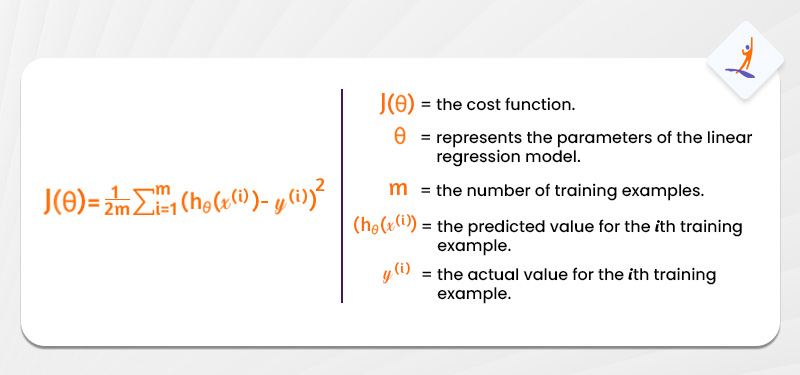

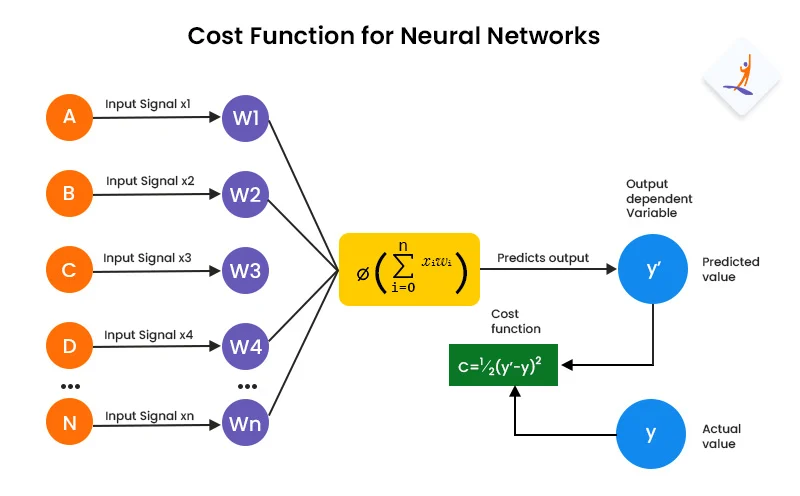

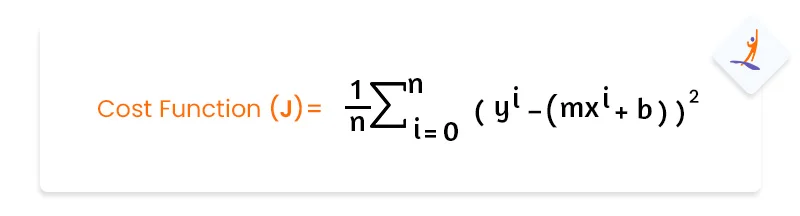

Here’s an explanation of the parameters in the formula:

n: Number of data points in the dataset.
y: Actual value of the dependent variable for the ith data point.
m and b: Parameters of the linear regression model

## Regression  Cost function

### Mean Squared Error (MSE) / L2 Loss - Regression

* **Formula:** $ \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $
    * $y_i$: actual target value for the i-th data point
    * $\hat{y}_i$: predicted output for the i-th data point
    * $N$: number of data points
* **Pros:**
    * Conceptually simple and widely used.
    * Differentiable, making it suitable for gradient-based optimization.
    * Penalizes larger errors more heavily than smaller ones due to the squaring term.
* **Cons:**
    * Highly sensitive to outliers due to the squaring. Large errors contribute disproportionately to the total loss.
* **When to Use:** Primarily for **regression problems** where you want to minimize the average squared difference between predictions and actual values.

In [ ]:
import tensorflow as tf

# Using in model compilation
model.compile(optimizer='adam', loss='mse')

# Using the function directly (e.g., for custom training loops)
mse_loss_fn = tf.keras.losses.MeanSquaredError()
y_true = tf.constant([1.0, 2.0, 3.0])
y_pred = tf.constant([1.1, 1.9, 3.5])
loss = mse_loss_fn(y_true, y_pred)
print(f"MSE Loss: {loss.numpy()}")

### Mean Absolute Error (MAE) / L1 Loss

* **Formula:** $ \text{MAE} = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i| $
* **Pros:**
    * Less sensitive to outliers compared to MSE because it takes the absolute difference, not the squared difference.
    * Provides a more robust measure of the average error.
* **Cons:**
    * The gradient is constant regardless of the error magnitude, which can make optimization slower or less stable near the minimum.
    * Not differentiable at zero (though this is handled well by optimization algorithms in practice).
* **When to Use:** For **regression problems**, especially when your data might contain significant outliers. Also useful when you want a more interpretable error metric (average absolute error).

In [ ]:
import tensorflow as tf

# Using in model compilation
model.compile(optimizer='adam', loss='mae')

# Using the function directly
mae_loss_fn = tf.keras.losses.MeanAbsoluteError()
y_true = tf.constant([1.0, 2.0, 3.0])
y_pred = tf.constant([1.1, 1.9, 3.5])
loss = mae_loss_fn(y_true, y_pred)
print(f"MAE Loss: {loss.numpy()}")

### Huber Loss (Smooth Mean Absolute Error)

* **Formula:**
    $\text{Huber}(y, \hat{y}, \delta) = \begin{cases} \frac{1}{2}(y - \hat{y})^2 & \text{if } |y - \hat{y}| \le \delta \\ \delta |y - \hat{y}| - \frac{1}{2}\delta^2 & \text{if } |y - \hat{y}| > \delta \end{cases} $
    * $\delta$ is a hyperparameter, typically tuned.
* **Pros:**
    * Combines the best of MSE and MAE. It's quadratic for small errors (like MSE, providing a clear gradient near the minimum) and linear for large errors (like MAE, making it less sensitive to outliers).
    * Differentiable everywhere.
* **Cons:**
    * Requires tuning the $\delta$ hyperparameter.
* **When to Use:** For **regression problems** when you want a loss function that is less sensitive to outliers than MSE but provides a smoother gradient than MAE near the optimum.

In [ ]:
import tensorflow as tf

# Using in model compilation (default delta is 1.0)
model.compile(optimizer='adam', loss='huber')

# Using with a specific delta value
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=0.5))

# Using the function directly
huber_loss_fn = tf.keras.losses.Huber(delta=1.0)
y_true = tf.constant([1.0, 2.0, 3.0])
y_pred = tf.constant([1.1, 1.9, 3.5])
loss = huber_loss_fn(y_true, y_pred)
print(f"Huber Loss: {loss.numpy()}")

## Binary Classification Cost Function

### Binary Cross-Entropy - binary classification problems

* **Formula:** $ \text{BCE} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $
    * $y_i \in \{0, 1\}$: actual binary label
    * $\hat{y}_i \in (0, 1)$: predicted probability for class 1 (output of a sigmoid activation)
* **Pros:**
    * Appropriate for probability outputs (from sigmoid).
    * Heavily penalizes confident wrong predictions (e.g., predicting 0.9 when the true label is 0).
    * The gradient is proportional to the difference between the prediction and the true value, providing a strong learning signal.
* **Cons:**
    * Requires the output to be a probability (between 0 and 1).
* **When to Use:** For **binary classification problems** where the output layer has a single neuron with a **sigmoid** activation function.

In [ ]:
import tensorflow as tf

# Using in model compilation
# Recommended for numerical stability: use from_logits=True if the output layer is linear (no sigmoid)
# and the loss function applies sigmoid internally.
# If your output layer *already* has sigmoid, use from_logits=False (default).
model.compile(optimizer='adam', loss='binary_crossentropy') # Assumes output layer has sigmoid

# Using the function directly
bce_loss_fn = tf.keras.losses.BinaryCrossentropy()
y_true = tf.constant([0, 1, 0, 1], dtype=tf.float32)
y_pred = tf.constant([0.1, 0.9, 0.2, 0.8], dtype=tf.float32) # Probabilities from sigmoid
loss = bce_loss_fn(y_true, y_pred)
print(f"Binary Crossentropy Loss: {loss.numpy()}")

# Using with from_logits=True (if your model output is linear/logits)
bce_loss_fn_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)
y_true = tf.constant([0, 1, 0, 1], dtype=tf.float32)
y_pred_logits = tf.constant([-2.2, 2.2, -1.4, 1.4], dtype=tf.float32) # Logits (before sigmoid)
loss_logits = bce_loss_fn_logits(y_true, y_pred_logits)
print(f"Binary Crossentropy Loss (from_logits=True): {loss_logits.numpy()}")

**Note:** Using `from_logits=True` with `BinaryCrossentropy` is often more numerically stable than having a sigmoid layer followed by `BinaryCrossentropy(from_logits=False)`.

## Multi-class Classification Cost Function

### Categorical Cross-Entropy - multi-class classification problems

* **Formula:** $ \text{CCE} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{ic} \log(\hat{y}_{ic}) $
    * $y_{ic} \in \{0, 1\}$: 1 if data point i belongs to class c, 0 otherwise (one-hot encoded)
    * $\hat{y}_{ic} \in (0, 1)$: predicted probability for data point i belonging to class c (output of softmax)
    * $C$: number of classes
* **Pros:**
    * Appropriate for multi-class classification with mutually exclusive classes.
    * Works well with softmax output, which provides a probability distribution.
* **Cons:**
    * Requires the true labels to be **one-hot encoded**.
* **When to Use:** For **multi-class classification problems** where the true labels are **one-hot encoded** and the output layer has a **softmax** activation function.

In [ ]:
import tensorflow as tf

# Using in model compilation
# Recommended for numerical stability: use from_logits=True if the output layer is linear (no softmax)
# and the loss function applies softmax internally.
# If your output layer *already* has softmax, use from_logits=False (default).
model.compile(optimizer='adam', loss='categorical_crossentropy') # Assumes output layer has softmax

# Using the function directly
cce_loss_fn = tf.keras.losses.CategoricalCrossentropy()
y_true_one_hot = tf.constant([[0, 1, 0], [1, 0, 0], [0, 0, 1]], dtype=tf.float32) # One-hot encoded labels
y_pred_probs = tf.constant([[0.1, 0.8, 0.1], [0.9, 0.05, 0.05], [0.2, 0.2, 0.6]], dtype=tf.float32) # Probabilities from softmax
loss = cce_loss_fn(y_true_one_hot, y_pred_probs)
print(f"Categorical Crossentropy Loss: {loss.numpy()}")

# Using with from_logits=True (if your model output is linear/logits)
cce_loss_fn_logits = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
y_true_one_hot = tf.constant([[0, 1, 0], [1, 0, 0], [0, 0, 1]], dtype=tf.float32) # One-hot encoded labels
y_pred_logits = tf.constant([[-2.2, 2.2, -0.5], [2.5, -1.5, -1.0], [-0.1, -0.1, 1.0]], dtype=tf.float32) # Logits (before softmax)
loss_logits = cce_loss_fn_logits(y_true_one_hot, y_pred_logits)
print(f"Categorical Crossentropy Loss (from_logits=True): {loss_logits.numpy()}")

**Note:** Similar to Binary Crossentropy, using `from_logits=True` with `CategoricalCrossentropy` is often preferred for numerical stability if your output layer does *not* have a softmax activation.

### Sparse Categorical Cross-Entropy

* **Formula:** Effectively the same as Categorical Cross-Entropy, but optimized to work with integer labels instead of one-hot encoded labels.
* **Pros:**
    * Suitable for multi-class classification with mutually exclusive classes.
    * Does **not** require one-hot encoding of true labels, saving memory and pre-processing steps, especially with a large number of classes.
    * Works well with softmax output.
* **Cons:**
    * Requires the true labels to be integers representing the class index.
* **When to Use:** For **multi-class classification problems** where the true labels are **integers** and the output layer has a **softmax** activation function.

In [ ]:
import tensorflow as tf

# Using in model compilation
# Recommended for numerical stability: use from_logits=True if the output layer is linear (no softmax)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy') # Assumes output layer has softmax

# Using the function directly
scce_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
y_true_int = tf.constant([1, 0, 2], dtype=tf.int32) # Integer labels (class indices)
y_pred_probs = tf.constant([[0.1, 0.8, 0.1], [0.9, 0.05, 0.05], [0.2, 0.2, 0.6]], dtype=tf.float32) # Probabilities from softmax
loss = scce_loss_fn(y_true_int, y_pred_probs)
print(f"Sparse Categorical Crossentropy Loss: {loss.numpy()}")

# Using with from_logits=True (if your model output is linear/logits)
scce_loss_fn_logits = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
y_true_int = tf.constant([1, 0, 2], dtype=tf.int32) # Integer labels
y_pred_logits = tf.constant([[-2.2, 2.2, -0.5], [2.5, -1.5, -1.0], [-0.1, -0.1, 1.0]], dtype=tf.float32) # Logits
loss_logits = scce_loss_fn_logits(y_true_int, y_pred_logits)
print(f"Sparse Categorical Crossentropy Loss (from_logits=True): {loss_logits.numpy()}")

**Note:** Choose between `CategoricalCrossentropy` and `SparseCategoricalCrossentropy` based *only* on the format of your true labels (one-hot or integer).

## Probability distribution

### Kullback-Leibler Divergence (KL Divergence)

* **Formula:** $ \text{KL}(P || Q) = \sum_i P(i) \log \frac{P(i)}{Q(i)} $
    * $P$: The true probability distribution.
    * $Q$: The predicted probability distribution.
* **Pros:**
    * Measures how one probability distribution differs from a second, expected probability distribution.
    * Used when the target is itself a probability distribution (e.g., in tasks like knowledge distillation or predicting a distribution over classes).
* **Cons:**
    * Requires both inputs (true and predicted) to be probability distributions.
* **When to Use:** When the target is *not* a single class label but rather a **probability distribution over classes or categories**. Often used in more advanced scenarios like **variational autoencoders (VAs) or when the training data provides soft labels (probabilities)** instead of hard labels (one-hot).

In [ ]:
import tensorflow as tf

# Using in model compilation
model.compile(optimizer='adam', loss='kl_divergence')

# Using the function directly
kl_loss_fn = tf.keras.losses.KLDivergence()
y_true_dist = tf.constant([[0.1, 0.8, 0.1], [0.9, 0.05, 0.05]], dtype=tf.float32) # True distribution (sum to 1)
y_pred_dist = tf.constant([[0.2, 0.7, 0.1], [0.8, 0.1, 0.1]], dtype=tf.float32) # Predicted distribution (sum to 1)
loss = kl_loss_fn(y_true_dist, y_pred_dist)
print(f"KL Divergence Loss: {loss.numpy()}")

## Choosing the Right Loss Function Summary

* **Regression:**
    * **MSE:** Standard default, sensitive to outliers.
    * **MAE:** More robust to outliers, less smooth gradient.
    * **Huber:** Good compromise, less sensitive to outliers than MSE, smoother than MAE.
* **Binary Classification:**
    * **Binary Cross-Entropy:** Standard choice, use `from_logits=True` if output is linear, `from_logits=False` if output is sigmoid.
* **Multi-class Classification (mutually exclusive classes):**
    * **Categorical Cross-Entropy:** Use if true labels are **one-hot encoded**. Use `from_logits=True` if output is linear, `from_logits=False` if output is softmax.
    * **Sparse Categorical Cross-Entropy:** Use if true labels are **integers**. Use `from_logits=True` if output is linear, `from_logits=False` if output is softmax.
* **Multi-class Classification (non-exclusive classes, multi-label):**
    * Typically use **Binary Cross-Entropy** for each output neuron independently, often with sigmoid activation on each output neuron. TensorFlow has `BinaryCrossentropy` which works for multi-label if the last layer has sigmoid activations.
* **Predicting Probability Distribution:**
    * **KL Divergence:** When your target is a probability distribution.

Selecting the appropriate loss function is as important as choosing the right architecture and activation functions for your DNN to learn effectively and minimize the relevant error for your specific task.

# Optimizer

- An optimizer is an algorithm used to **minimize the loss function during the training of a neural network**.

- It determines how the network's weights and biases are updated based on the gradients of the loss function with respect to these parameters.

- Essentially, optimizers are the engines that drive the learning process.

- An optimizer is one of the two arguments required for compiling a Keras model

## How Optimizers Work (The Core Idea: Gradient Descent)


Most optimizers are based on the principle of **Gradient Descent**. The gradient of the loss function tells us the direction of the steepest increase in loss. To minimize the loss, we need to move in the opposite direction of the gradient.

The basic update rule for a parameter (let's call it $\theta$) in simple Gradient Descent is:

$ \theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \nabla J(\theta_{\text{old}}) $

Where:
* $\theta$: A parameter (weight or bias) of the network.
* $\eta$: The **learning rate**, a hyperparameter that controls the step size of the update. A larger learning rate means bigger steps, while a smaller learning rate means smaller steps.
* $\nabla J(\theta)$: The gradient of the loss function ($J$) with respect to the parameter $\theta$.

**Stochastic Gradient Descent (SGD)** computes the gradient on a small random subset of the data called a **mini-batch**, rather than the entire dataset. This makes updates much faster, introduces noise that can help escape local minima, and is the standard approach in modern DNN training.

Different optimizers introduce variations to this basic update rule to improve convergence speed, stability, and the ability to find better minima.

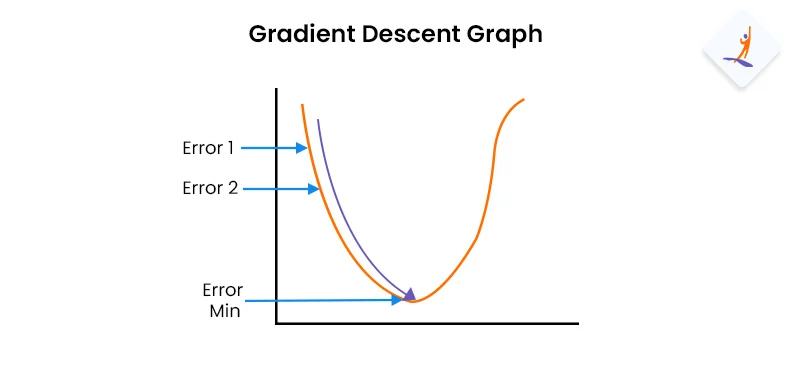

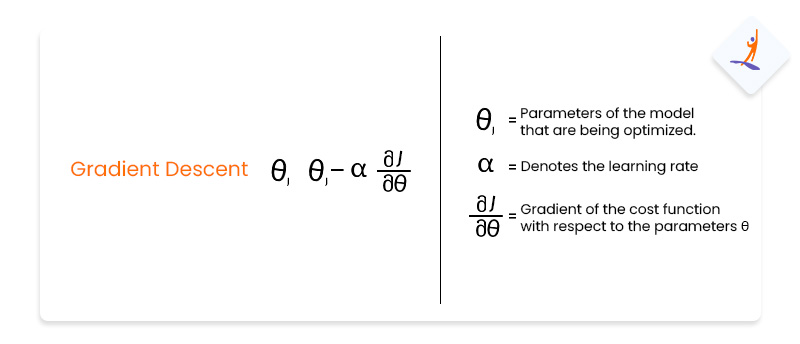

## Stochastic Gradient Descent (SGD)

* **Concept:** Computes the gradient using a mini-batch and updates parameters in the direction opposite to the gradient, scaled by the learning rate.
* **Maths (Basic Update):** $ \theta \leftarrow \theta - \eta \cdot \nabla J(\theta) $
* **Pros:**
    * Conceptually simple.
    * Can escape shallow local minima due to the noise from mini-batches.
    * Computationally efficient per update step.
* **Cons:**
    * Can have slow convergence, especially in directions with high curvature (oscillates around the minimum).
    * Sensitive to the learning rate choice. A fixed learning rate might overshoot or get stuck.
* **When to Use:** Often used as a baseline. With proper learning rate scheduling, it can sometimes achieve good results, especially in convex optimization problems or for fine-tuning pre-trained models. Less common as the primary optimizer for training deep, complex models from scratch compared to adaptive methods.

In [ ]:
import tensorflow as tf

# Example Model (placeholder)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Using SGD
# You can specify the learning rate, momentum, etc.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# use a learning rate schedule to modulate how the learning rate of your optimizer changes over time:


lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)


## SGD with Momentum

* **Concept:** Adds a "momentum" term that accumulates a velocity vector of past gradients. This helps accelerate convergence in the right direction and dampens oscillations.
* **Maths (Core Idea):**
    * $ v \leftarrow \beta \cdot v + (1 - \beta) \cdot \nabla J(\theta) $ (Update velocity vector, $\beta$ is the momentum hyperparameter, typically 0.9)
    * $ \theta \leftarrow \theta - \eta \cdot v $ (Update parameters using the velocity)
    * *Note: There's also Nesterov Momentum (NAG) which looks slightly ahead before computing the gradient.*
* **Pros:**
    * Faster convergence than basic SGD.
    * Helps overcome oscillations and navigate narrow valleys in the loss landscape.
* **Cons:**
    * Requires tuning the momentum hyperparameter ($\beta$) in addition to the learning rate ($\eta$).
* **When to Use:** A solid improvement over basic SGD. Often a strong choice when you want the simplicity of SGD but with better convergence properties.

In [ ]:
import tensorflow as tf

# Example Model (placeholder)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Using SGD
# You can specify the learning rate, momentum, etc.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Adagrad (Adaptive Gradient)

* **Concept:** Adapts the learning rate *per parameter*. It divides the learning rate by the square root of the sum of squared past gradients for that parameter. This means parameters with large gradients get smaller updates, and parameters with small gradients get larger updates.
* **Maths (Core Idea):**
    * $ G \leftarrow G + (\nabla J(\theta))^2 $ (Accumulate squared gradients per parameter)
    * $ \theta \leftarrow \theta - \frac{\eta}{\sqrt{G + \epsilon}} \cdot \nabla J(\theta) $ ($\epsilon$ is a small constant to prevent division by zero)
* **Pros:**
    * Automatically adapts learning rates, requiring less manual tuning.
    * Works well for sparse data, where different parameters have different frequencies of updates.
* **Cons:**
    * The accumulation of squared gradients in the denominator can cause the learning rate to become progressively smaller and eventually diminish to zero, stopping learning prematurely.
* **When to Use:** Effective for sparse data (like in NLP tasks with rare words). Generally not recommended for deep networks training for a long time due to the diminishing learning rate issue.


## RMSprop (Root Mean Square Propagation)

* **Concept:** Addresses Adagrad's diminishing learning rate problem by using a moving average of squared gradients instead of the cumulative sum.
* **Maths (Core Idea):**
    * $ E[\nabla J(\theta)^2] \leftarrow \beta \cdot E[\nabla J(\theta)^2] + (1 - \beta) \cdot (\nabla J(\theta))^2 $ (Exponentially weighted moving average of squared gradients, $\beta$ is a decay rate)
    * $ \theta \leftarrow \theta - \frac{\eta}{\sqrt{E[\nabla J(\theta)^2] + \epsilon}} \cdot \nabla J(\theta) $
* **Pros:**
    * Alleviates the diminishing learning rate issue of Adagrad.
    * Works well in practice, often used in RNNs.
* **Cons:**
    * Requires tuning $\eta$ and $\beta$.
* **When to Use:** A good general-purpose optimizer. Often used in sequence models and reinforcement learning.

In [ ]:
# Using RMSprop
# You can specify learning rate, rho (decay rate), epsilon, etc.
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Adam (Adaptive Moment Estimation)

* **Concept:** Combines the ideas of Momentum (using a moving average of gradients) and RMSprop (using a moving average of squared gradients). It also includes bias correction for the initial steps.
* **Maths (Core Idea - simplified, ignoring bias correction):**
    * $ m \leftarrow \beta_1 \cdot m + (1 - \beta_1) \cdot \nabla J(\theta) $ (First moment, similar to momentum)
    * $ v \leftarrow \beta_2 \cdot v + (1 - \beta_2) \cdot (\nabla J(\theta))^2 $ (Second moment, similar to RMSprop)
    * $ \theta \leftarrow \theta - \eta \cdot \frac{m}{\sqrt{v} + \epsilon} $ (Update using both moments)
    * *Adam uses bias correction for $m$ and $v$ especially in early steps.*
* **Pros:**
    * Widely considered the default optimizer for many tasks due to its adaptive learning rates and good performance.
    * Generally requires less tuning of the learning rate than SGD or SGD with Momentum.
* **Cons:**
    * Can sometimes converge to a suboptimal solution compared to SGD with momentum in certain tasks.
    * The update rule and mathematics are more complex than simpler optimizers.
* **When to Use:** A solid go-to optimizer for a wide variety of problems and network architectures.

In [ ]:
import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)


In [ ]:
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# Using Adam
# You can specify learning rate, beta_1, beta_2, epsilon, etc.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Using Adagrad
# You can specify learning rate, initial_accumulator_value, epsilon, etc.
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## AdamW

* **Concept:** A variant of Adam that decouples weight decay (L2 regularization) from the gradient update. Standard Adam combines weight decay with the gradient update in a way that is not ideal for certain regularization strategies. AdamW applies weight decay *after* the Adam update step.
* **Maths (Core Idea - simplified after Adam update step):**
    * $ \theta \leftarrow \theta - \text{learning\_rate} \cdot \text{weight\_decay} \cdot \theta $
* **Pros:**
    * Improves regularization effectiveness compared to standard Adam when using weight decay.
    * Often leads to better generalization performance.
* **Cons:**
    * Slightly more complex than standard Adam.
* **When to Use:** When using L2 regularization (weight decay) with Adam. Recommended over standard Adam in many modern applications, especially for large models.


In [ ]:
# Using AdamW (requires TensorFlow version 2.8 or higher)
# Note: Weight decay is handled separately here
# model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.004),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

## Adadelta

* **Concept:** An extension of Adagrad that aims to address the diminishing learning rate issue without needing a global learning rate. It uses a ratio of the running average of update steps and the running average of squared gradients.
* **Maths (Core Idea - complex, involves ratio of moving averages):** $ \Delta \theta \leftarrow - \frac{\text{RMS}[\Delta \theta]_{\text{old}}}{\text{RMS}[\nabla J(\theta)]} \nabla J(\theta) $
* **Pros:**
    * Does not require a manual learning rate hyperparameter.
* **Cons:**
    * Can be slower to converge than Adam or RMSprop.
* **When to Use:** Less commonly used as a default compared to Adam or RMSprop, but can be useful in specific scenarios or as an alternative to Adagrad.

In [ ]:

# Using Adadelta
# You can specify learning rate, rho, epsilon, etc.
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Choosing the Right Optimizer:


* **Start with Adam:** For most tasks and architectures, Adam is a great default and often performs well with its default hyperparameters.
* **Consider AdamW:** If you are using weight decay for regularization, AdamW is generally preferred over Adam.
* **Try RMSprop:** A strong alternative to Adam, historically popular for RNNs.
* **Consider SGD with Momentum:** While less common as a default for training from scratch, it can sometimes find sharper minima leading to better generalization, especially with careful learning rate scheduling. Also useful for fine-tuning.
* **Use Adagrad for Sparse Data:** If your data is very sparse and you're having trouble with other optimizers, Adagrad might be worth trying.
* **Experimentation is Key:** The optimal optimizer and its hyperparameters often depend on the specific dataset, network architecture, and task. It's common practice to try a few different optimizers and learning rates and see which one yields the best performance.

Understanding how these optimizers work under the hood provides valuable insight into the training process and helps you diagnose issues like slow convergence or instability.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# --- Placeholder Model ---
# We'll use this simple model structure for all optimizer examples
def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax') # Example for a 10-class classification
    ])
    return model
# -------------------------

# --- 1. Stochastic Gradient Descent (SGD) ---
print("--- Using SGD Optimizer ---")
model_sgd = build_model()
# Basic SGD
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
model_sgd.summary()
print("\n")

# SGD with Momentum
print("--- Using SGD with Momentum Optimizer ---")
model_sgd_momentum = build_model()
model_sgd_momentum.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
model_sgd_momentum.summary()
print("\n")


# --- 2. RMSprop ---
print("--- Using RMSprop Optimizer ---")
model_rmsprop = build_model()
# You can adjust learning_rate, rho (decay rate), epsilon, etc.
model_rmsprop.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
model_rmsprop.summary()
print("\n")


# --- 3. Adam ---
print("--- Using Adam Optimizer ---")
model_adam = build_model()
# You can adjust learning_rate, beta_1, beta_2, epsilon, etc.
model_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
model_adam.summary()
print("\n")


# --- 4. AdamW (Requires TensorFlow 2.8 or higher) ---
# Uncomment the following block if you have TF 2.8+
# print("--- Using AdamW Optimizer ---")
# model_adamw = build_model()
# # Note: weight_decay is a separate parameter here
# model_adamw.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.004),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])
# model_adamw.summary()
# print("\n")


# --- 5. Adagrad ---
print("--- Using Adagrad Optimizer ---")
model_adagrad = build_model()
# You can adjust learning_rate, initial_accumulator_value, etc.
model_adagrad.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
model_adagrad.summary()
print("\n")


# --- 6. Adadelta ---
print("--- Using Adadelta Optimizer ---")
model_adadelta = build_model()
# You can adjust learning_rate, rho, epsilon, etc.
# Note: Adadelta's default learning rate is often 1.0
model_adadelta.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
model_adadelta.summary()
print("\n")

# Metrics

- Deep Neural Networks (DNNs) organized in a sequential model architecture, such as those built with Keras's Sequential API or employing recurrent layers like LSTMs and GRUs, utilize various metrics to evaluate their performance.

- The choice of metrics primarily depends on the type of problem the model is designed to solve: classification or regression.

- While standard metrics from these domains are widely applicable, the sequential nature of the data processed by these models can sometimes necessitate or benefit from specific evaluation approaches.


## **For Classification Tasks:**

Sequential models used for classification, such as sentiment analysis, spam detection, or sequence labeling, commonly employ metrics that assess the model's ability to correctly categorize inputs over time or for an entire sequence. Key metrics include:

* **Accuracy:** The proportion of correctly classified instances (individual time steps or entire sequences) out of the total number of instances. While simple, it can be **misleading in cases of class imbalance**.

* **Precision:** Of all the instances predicted as a certain class, what proportion actually belongs to that class. This is **crucial when the cost of false positives is high**.

* **Recall (Sensitivity):** Of all the actual instances of a certain class, what proportion was correctly identified by the model. This is important **when the cost of false negatives is high**.

* **F1-Score:** The harmonic mean of precision and recall, providing a single metric that balances both concerns. It's particularly **useful in the presence of class imbalance**.

* **Confusion Matrix:** A table that summarizes the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives. This provides a detailed breakdown of classification performance across all classes.

* **AUC (Area Under the Receiver Operating Characteristic Curve):** Measures the model's ability to distinguish between classes. A higher AUC indicates better discriminatory power. This is often used for binary classification but can be extended to multi-class scenarios.

* **Categorical Crossentropy (Log Loss):** While also a common loss function during training, it is often reported as a metric to evaluate the model's output probability distribution against the true labels. Lower values indicate better performance.

## **For Regression Tasks:**


When a sequential model is used for regression, such as time series forecasting or predicting a continuous value based on a sequence of inputs, the metrics focus on the difference between the predicted and actual continuous outputs. Common regression metrics include:

* **Mean Squared Error (MSE):** The average of the squared differences between the predicted and actual values. It heavily penalizes larger errors.

* **Root Mean Squared Error (RMSE):** The square root of the MSE. It provides an error measure in the same units as the target variable, making it easier to interpret than MSE.

* **Mean Absolute Error (MAE):** The average of the absolute differences between the predicted and actual values. It is less sensitive to outliers compared to MSE and RMSE.

* **Mean Absolute Percentage Error (MAPE):** The average of the absolute percentage errors. Useful for understanding the error in relation to the magnitude of the actual values, but can be problematic with zero values.

* **R-squared ($R^2$):** Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A value closer to 1 indicates a better fit.

## **Metrics Specific to Sequential Data:**

While the above metrics are widely used, the sequential nature of the data can sometimes call for additional considerations, especially in tasks like sequence generation or detailed sequence analysis. Metrics in this category might include:

* **Sequence Accuracy:** In sequence-to-sequence models, this might refer to the percentage of sequences where every element in the predicted sequence matches the actual sequence. This is a very strict metric.

* **Edit Distance (e.g., Levenshtein Distance):** Measures the minimum number of single-element edits (insertions, deletions, or substitutions) required to change one sequence into the other. Lower values indicate greater similarity between predicted and actual sequences. This is particularly relevant in tasks like spell correction or DNA sequence analysis.

* **Dynamic Time Warping (DTW):** A technique to measure the similarity between two sequences that may vary in timing or speed. Useful in applications like speech recognition or gesture recognition.

* **Perplexity:** Commonly used in language modeling, it measures how well a probability model predicts a sample. Lower perplexity indicates a better model.







In practice, when working with DNN sequential models, it is common to monitor several metrics during training and evaluation to gain a comprehensive understanding of the model's performance and identify potential issues like overfitting or underfitting. The specific problem and the relative costs of different types of errors should guide the selection of the most important metrics to optimize.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# 1. Load and preprocess the MNIST dataset
# The MNIST dataset is included in Keras and is easily accessible.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocess the data:
# - Normalize the pixel values from 0-255 to 0-1.
# - Reshape the images to a single vector for the Dense layers.
# - Convert labels to one-hot encoding for categorical crossentropy loss.
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

In [4]:
# Convert labels to one-hot encoding (e.g., 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [5]:

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train_one_hot.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test_one_hot.shape}")

Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Testing data shape: (10000, 784)
Testing labels shape: (10000, 10)


In [10]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
# 2. Define the Sequential DNN model
# A simple model with two dense layers.
model = Sequential([
    # Flatten layer to reshape the input images (28x28) into a 1D vector (784)
    Flatten(input_shape=(28 * 28,)),
    # First dense layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    # Second dense layer with 64 neurons and ReLU activation
    Dense(64, activation='relu'),
    # Output dense layer with 10 neurons (one for each digit class)
    # Softmax activation to output probabilities for each class
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# 3. Compile the model with loss function, optimizer, and metrics
# For multi-class classification, 'categorical_crossentropy' is a common loss.
# 'adam' is a popular optimizer.
# We include 'accuracy' as a metric to track the percentage of correct predictions.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 4. Train the model
# Train the model using the training data and validate with the test data.
# The metrics specified in compile() are monitored during training.
epochs = 10
batch_size = 32
history = model.fit(x_train, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test_one_hot))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8760 - loss: 0.4329 - val_accuracy: 0.9626 - val_loss: 0.1196
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9682 - loss: 0.1079 - val_accuracy: 0.9711 - val_loss: 0.0935
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9787 - loss: 0.0686 - val_accuracy: 0.9725 - val_loss: 0.0860
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9834 - loss: 0.0545 - val_accuracy: 0.9733 - val_loss: 0.0849
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0447 - val_accuracy: 0.9708 - val_loss: 0.0960
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9771 - val_loss: 0.0807
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9910 - loss: 0.0266 - val_accuracy: 0.9756 - val_loss: 0.0919
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9928 - loss: 0.02

In [11]:
# Accessing metric details from the training history
print("\nTraining History Metrics:")
print(history.history.keys()) # Shows available metrics (loss, accuracy, val_loss, val_accuracy)


Training History Metrics:
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


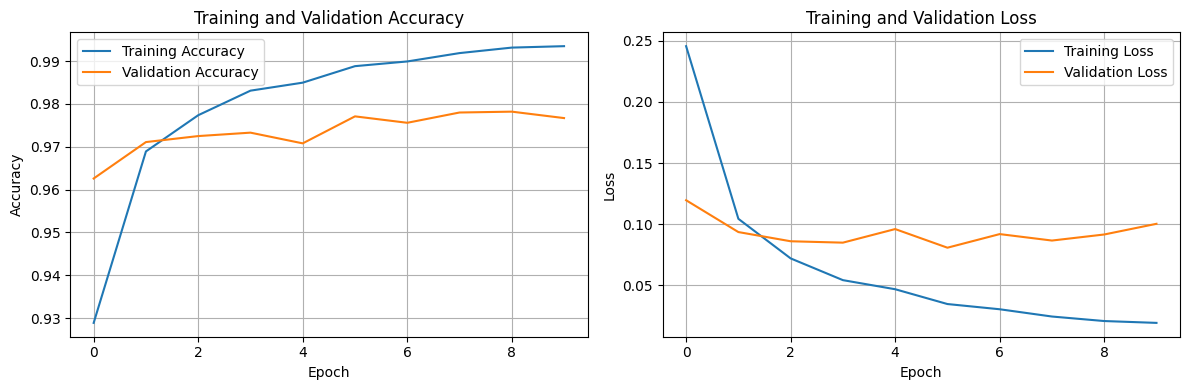

In [12]:
# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# 5. Evaluate the model on the test set
# This gives the final metric values on unseen data.
print("\nEvaluating the model on the test set:")
loss, accuracy = model.evaluate(x_test, y_test_one_hot, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating the model on the test set:
Test Loss: 0.1003
Test Accuracy: 0.9767


In [14]:

# Example of using other classification metrics (requires predictions)
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
# Get predictions for the test set
y_pred_probs = model.predict(x_test)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [16]:

# Classification Report (includes Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Confusion Matrix:
[[ 969    1    0    1    2    2    4    0    0    1]
 [   0 1123    1    2    0    0    4    0    5    0]
 [   3    0 1005    6    2    0    2    5    8    1]
 [   0    1    3  986    0    6    0   

# Epochs

- Epoch is a fundamental concept that refers to one complete pass through the entire training dataset.

- During an epoch, every training example is presented to the neural network once, and the model's internal parameters (weights and biases) are updated based on the calculated gradients and the chosen optimization algorithm.

- **Batch Processing** - Training data is usually divided into smaller batches. The model's weights are updated after processing each batch. An epoch consists of processing all these batches until the entire dataset has been seen. Multiple epochs mean repeating this batch processing cycle

- If number is epochs is less, underfitting might occur

- If more, overfitting might occur

## **Determining the Optimal Number of Epochs**

- Monitoring Validation Metrics
  - The model is trained on the training set, and its performance is evaluated on the validation set at the end of each epoch (or at regular intervals). By monitoring metrics like validation loss or accuracy, you can observe how well the model is generalizing to unseen data.

- Early Stopping
  - powerful technique where training is halted automatically when the performance on the validation set stops improving or starts to degrade. This prevents the model from overfitting by stopping the training at the point where it generalizes best

- Learning Curves
  - Plotting the training and validation loss and metrics against the number of epochs (learning curves) provides a visual way to diagnose underfitting or overfitting and help determine an appropriate number of epochs

- Experimentation

# Regularization Techniques

Overfitting is a major challenge when training Deep Neural Networks (DNNs), especially with complex models and limited data. A model that overfits performs exceptionally well on the training data but fails to generalize to new, unseen examples. **Regularization techniques** are methods used to combat overfitting and improve the model's ability to perform well on data it hasn't encountered before.

Using regularization techniques is essential for training DNNs that perform well on real-world data. By mitigating overfitting, regularization helps ensure that the **model has learned the underlying patterns in the data rather than just memorizing the training examples**. This leads to **better generalization and more reliable predictions on unseen data**. Often, a combination of these techniques is used to achieve the best results.

The core idea behind regularization is to add constraints or penalties to the learning process to discourage the model from becoming too complex or too reliant on the specific nuances of the training data.

## 1.Batch Normalization

Batch Normalization (BatchNorm) is a widely used technique in training Deep Neural Networks (DNNs) that aims to improve the training speed, stability, and performance. It was introduced to address the issue of **Internal Covariate Shift**

* **How it works:** Normalizes the inputs to each layer within a mini-batch during training. While its primary goal is to improve training speed and stability by reducing internal covariate shift, it also has a regularization effect.

* **Benefits:** Helps stabilize training, allows for higher learning rates, and provides a slight regularization effect, reducing overfitting.

### Internal Covariate Shift Problem

During the training of a deep neural network, the parameters of each layer are constantly being updated. This means that the distribution of inputs to a particular layer changes as the training progresses and the parameters of the preceding layers change. This phenomenon is called Internal Covariate Shift.

Imagine a layer deep within the network. As the layers before it learn and adjust their weights, the data they output (which serves as the input to our chosen layer) will have a changing distribution (different means and variances). This forces the current layer to continuously adapt to a new distribution of inputs, making the learning process slower and potentially unstable. It's like trying to hit a moving target.

### How Batch Normalization Works:


Batch Normalization tackles this problem by normalizing the inputs to each layer *within each mini-batch* during training. For a given layer and a mini-batch:

1.  **Calculate Mean and Variance:** It computes the mean and variance of the inputs for that layer across the current mini-batch.
2.  **Normalize:** It normalizes the inputs using the calculated mini-batch mean and variance, effectively centering the distribution around zero and scaling it to unit variance. The formula for normalization is:
    $$\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$$
    where $x_i$ is an input in the mini-batch, $\mu_B$ is the mini-batch mean, $\sigma_B^2$ is the mini-batch variance, and $\epsilon$ is a small constant added for numerical stability.
3.  **Scale and Shift:** To maintain the representational power of the network (i.e., to allow the network to learn identity mappings if beneficial), the normalized inputs are then scaled and shifted using two learnable parameters, $\gamma$ (gamma) and $\beta$ (beta):

    $$y_i = \gamma \hat{x}_i + \beta$$
    These $\gamma$ and $\beta$ parameters are learned during the training process along with the other network weights.

### Batch Normalization during Inference

During inference (when making predictions on new, unseen data), using the statistics of a single mini-batch wouldn't be appropriate as it would introduce variability. Instead, Batch Normalization uses the ** global mean and variance** calculated as moving averages over all the mini-batches seen during training. These learned global statistics are then used to normalize the inputs during inference in a deterministic manner:
$$y = \gamma \frac{x - \text{E}[x]}{\sqrt{\text{Var}[x] + \epsilon}} + \beta$$
where $\text{E}[x]$ and $\text{Var}[x]$ are the accumulated global mean and variance.

### Benefits of Using Batch Normalization

Incorporating Batch Normalization layers into a DNN offers several significant advantages:

* **Faster Training:** By stabilizing the input distribution to each layer, Batch Normalization allows for the use of higher learning rates, which can significantly accelerate the convergence of the training process.
* **Improved Training Stability:** It makes the training less sensitive to the initial weights of the network.
* **Higher Learning Rates:** As mentioned, the stabilized gradients allow for larger steps in the parameter space, leading to faster learning.
* **Acts as a Regularizer:** Batch Normalization adds a small amount of noise to the training process due to the statistics being calculated on mini-batches. This can have a regularization effect, similar to Dropout, which helps to reduce overfitting. This often reduces the need for other regularization techniques.
* **Reduces Dependence on Initialization:** Networks with Batch Normalization are less dependent on careful weight initialization.
* **Allows for Deeper Networks:** The stabilization provided by Batch Normalization makes it easier to train very deep networks that were previously difficult to converge due to vanishing or exploding gradients.

In essence, Batch Normalization helps to create a more consistent environment for each layer during training, allowing the network to learn more efficiently and effectively. It has become a standard component in many state-of-the-art deep learning architectures.

### Code Example

1.  **Dataset Loading and Preprocessing:** load the MNIST dataset, normalize the pixel values, and one-hot encode the labels.
2.  **Defining the Sequential Model with Batch Normalization:**
    * use the `Sequential` model
    * After the `Flatten` layer, we add the first `Dense` layer with 128 neurons.
    * Crucially, insert a `BatchNormalization()` layer *before* the activation function (`relu` in this case). This is a common and effective placement. The `BatchNormalization` layer will normalize the outputs of the preceding `Dense` layer across the mini-batch.
    * We then apply the `relu` activation using a separate `keras.layers.Activation` layer. Also include the activation directly in the `Dense` layer and place `BatchNormalization` after it, but placing it before is often preferred as it normalizes the values before they hit the non-linearity.
    * This pattern of `Dense -> BatchNormalization -> Activation` is repeated for the second hidden layer.
    * The output layer remains a `Dense` layer with `softmax` activation for the 10 classes.
3.  **Compiling the Model:** The compilation step is specifying the optimizer, loss function, and the metrics to monitor.
4.  **Training the Model:** Train the model using `model_bn.fit()`, providing the training and validation data. Keras automatically handles the forward and backward passes, including the batch normalization operations and the updating of its internal parameters ($\gamma$ and $\beta$, as well as the moving averages for inference).
5.  **Evaluating the Model:** After training, Evaluate the model on the test set using `model_bn.evaluate()` to get the final loss and accuracy.
6.  **Plotting History:** The training history is plotted to visualize the progress of accuracy and loss over epochs for both the training and validation sets, allowing to observe the training dynamics with Batch Normalization.



In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
# Normalize the pixel values from 0-255 to 0-1
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

In [20]:
# Convert labels to one-hot encoding
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train_one_hot.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test_one_hot.shape}")

Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Testing data shape: (10000, 784)
Testing labels shape: (10000, 10)


In [21]:
# Define the Sequential DNN model with Batch Normalization

"""
model_bn = Sequential([
    # Flatten layer to reshape the input images (28x28) into a 1D vector (784)
    Flatten(input_shape=(28 * 28,)),

    # First Dense layer
    Dense(128),
    # Batch Normalization layer after the dense layer and before the activation.
    # This normalizes the outputs of the Dense layer for the current batch.
    BatchNormalization(),
    # Activation function applied after normalization.
    keras.layers.Activation('relu'),

    # Second Dense layer
    Dense(64),
    # Batch Normalization layer
    BatchNormalization(),
    # Activation function
    keras.layers.Activation('relu'),

    # Output dense layer with softmax activation for classification
    Dense(num_classes, activation='softmax')
])"""

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model_bn = Sequential()
model_bn.add(Flatten(input_shape=(28 * 28,)))

# 1st Layer
model_bn.add(Dense(128))
model_bn.add(BatchNormalization())
model_bn.add(keras.layers.Activation('relu'))

# 2nd Layer
model_bn.add(Dense(64))
model_bn.add(BatchNormalization())
model_bn.add(keras.layers.Activation('relu'))

# Output Layer
model_bn.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# Compile the model
# We use 'adam' optimizer and 'categorical_crossentropy' loss for multi-class classification.
# 'accuracy' is included as a metric to monitor performance.
model_bn.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [25]:
# Display the model architecture, showing the added BatchNormalization layers
model_bn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [26]:

# Train the model
# The training process will use the BatchNormalization layers to normalize
# the activations within each batch.
epochs = 10
batch_size = 32
print("\nTraining the model with Batch Normalization...")
history_bn = model_bn.fit(x_train, y_train_one_hot,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(x_test, y_test_one_hot)) # Use test data for validation


Training the model with Batch Normalization...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8734 - loss: 0.4387 - val_accuracy: 0.9683 - val_loss: 0.1066
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9637 - loss: 0.1198 - val_accuracy: 0.9748 - val_loss: 0.0792
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9731 - loss: 0.0847 - val_accuracy: 0.9763 - val_loss: 0.0750
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9783 - loss: 0.0672 - val_accuracy: 0.9781 - val_loss: 0.0719
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9814 - loss: 0.0569 - val_accuracy: 0.9801 - val_loss: 0.0690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9839 - loss: 0.0501 - val_accuracy: 0.9785 - val_loss: 0.0706
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9863 - loss: 0.0421 - val_accuracy: 0.9795 - val_loss: 0.0680
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━

In [27]:
# Evaluate the model on the test set to get final performance metrics
print("\nEvaluating the model with Batch Normalization on the test set:")
loss_bn, accuracy_bn = model_bn.evaluate(x_test, y_test_one_hot, verbose=0)

print(f"Test Loss (with BN): {loss_bn:.4f}")
print(f"Test Accuracy (with BN): {accuracy_bn:.4f}")


Evaluating the model with Batch Normalization on the test set:
Test Loss (with BN): 0.0668
Test Accuracy (with BN): 0.9813


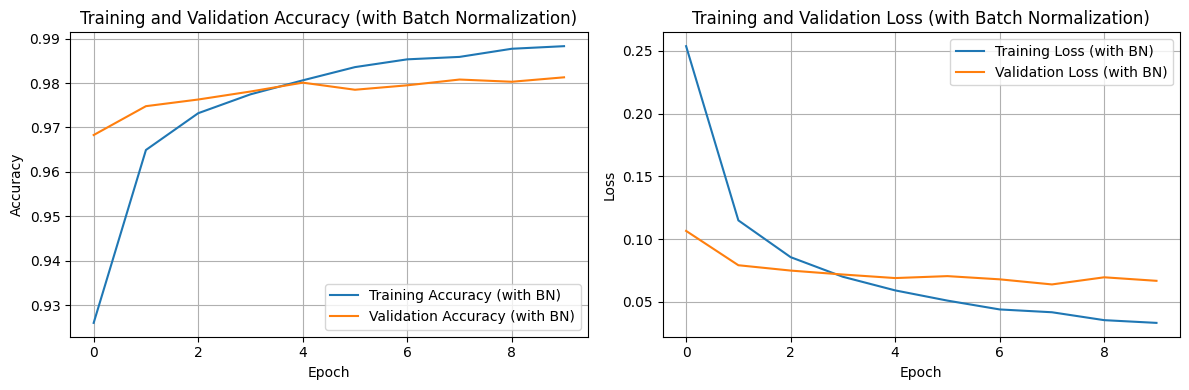

In [28]:
# Plotting training and validation accuracy and loss for the BN model
# This helps visualize the training progress and the effect of BN.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_bn.history['accuracy'], label='Training Accuracy (with BN)')
plt.plot(history_bn.history['val_accuracy'], label='Validation Accuracy (with BN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (with Batch Normalization)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_bn.history['loss'], label='Training Loss (with BN)')
plt.plot(history_bn.history['val_loss'], label='Validation Loss (with BN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (with Batch Normalization)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 2.Dropout

Dropout is a powerful and widely used regularization technique in training Deep Neural Networks (DNNs). Its primary purpose is to **prevent overfitting** and improve the model's ability to generalize to unseen data.

The core idea behind Dropout is simple yet effective: during training, randomly "drop out" (i.e., temporarily remove or ignore) a proportion of neurons and their connections from a layer.

* **How it works:** During training, randomly sets a fraction of the neurons in a layer to zero for each training iteration. This prevents neurons from co-adapting too much and forces the network to learn more robust and distributed representations.
* **Benefits:** A very effective technique for preventing overfitting by creating an ensemble effect and reducing the interdependence of neurons.

**How Dropout Works During Training:**

1.  **Random Deactivation:** For each training iteration (typically for each mini-batch), a random subset of neurons in a designated layer is chosen to be deactivated. The probability of a neuron being dropped is a hyperparameter called the "dropout rate" (commonly denoted by $p$). A typical dropout rate is between 0.2 and 0.5, meaning 20% to 50% of the neurons in the layer are randomly set to zero for that specific training step.
2.  **Thinned Network:** This random deactivation results in a "thinned" network for that particular training iteration. Only the active neurons participate in the forward pass to compute the output and in the backward pass to compute gradients.
3.  **Preventing Co-adaptation:** By randomly dropping neurons, Dropout prevents neurons from becoming overly reliant on the output of specific other neurons in the previous layer. This discourages complex co-adaptations where neurons might only fire in the presence of a very specific set of features from the previous layer. Instead, neurons are forced to learn more robust and independent features that are useful in conjunction with a randomly changing set of other neurons.
4.  **Ensemble Effect:** Dropout can be seen as training an ensemble of many different "thinned" networks simultaneously. Each training iteration samples and trains a different sub-network. At inference time, the full network is used, which can be seen as an approximation of averaging the predictions of all these thinned networks. This ensemble effect contributes to improved generalization.
5.  **Scaling of Activations:** To compensate for the fact that more neurons are active during inference than during training, the outputs of the neurons in the layers with Dropout are typically scaled during either training or inference.
    * **During Training (Inverted Dropout):** The outputs of the *kept* neurons are scaled up by dividing by the keep probability (1 - dropout rate). This is the more common implementation in modern deep learning libraries like TensorFlow and Pykeras, as it simplifies the inference step. If a neuron's output is $a$, and the dropout rate is $p$, the kept output is $a / (1-p)$, and the dropped output is $0$.
    * **During Inference:** The weights of the layer are scaled down by multiplying them by the keep probability (1 - dropout rate). With inverted dropout, this step is not needed during inference.

**How Dropout is Handled During Inference (Testing):**

During the inference or testing phase, **Dropout is typically turned off**. All neurons in the network are active, and their full connections are used. If inverted dropout was used during training, no further scaling is needed. If the less common scaling method was used during training, the weights of the layers with Dropout would be scaled by (1 - dropout rate) before the forward pass.

**Benefits of Using Dropout:**

* **Prevents Overfitting:** This is the primary benefit. By reducing the reliance on specific neurons and encouraging the learning of more robust features, Dropout makes the model less likely to memorize the training data and better able to generalize to unseen examples.
* **Improved Generalization:** As a direct consequence of preventing overfitting, Dropout leads to better performance on new data.
* **Reduced Co-adaptation:** It breaks down the dependencies between neurons, forcing them to learn more independently useful representations.
* **Ensemble Approximation:** It provides a computationally inexpensive way to approximate the benefits of training and averaging multiple models.
* **Allows for Larger Networks:** With Dropout as a regularization technique, you can often train larger and more complex models without them overfitting as easily.

Dropout is typically applied to the output of hidden layers. It is generally not applied to the input layer or the output layer. The dropout rate is a hyperparameter that needs to be tuned based on the specific dataset and model architecture.

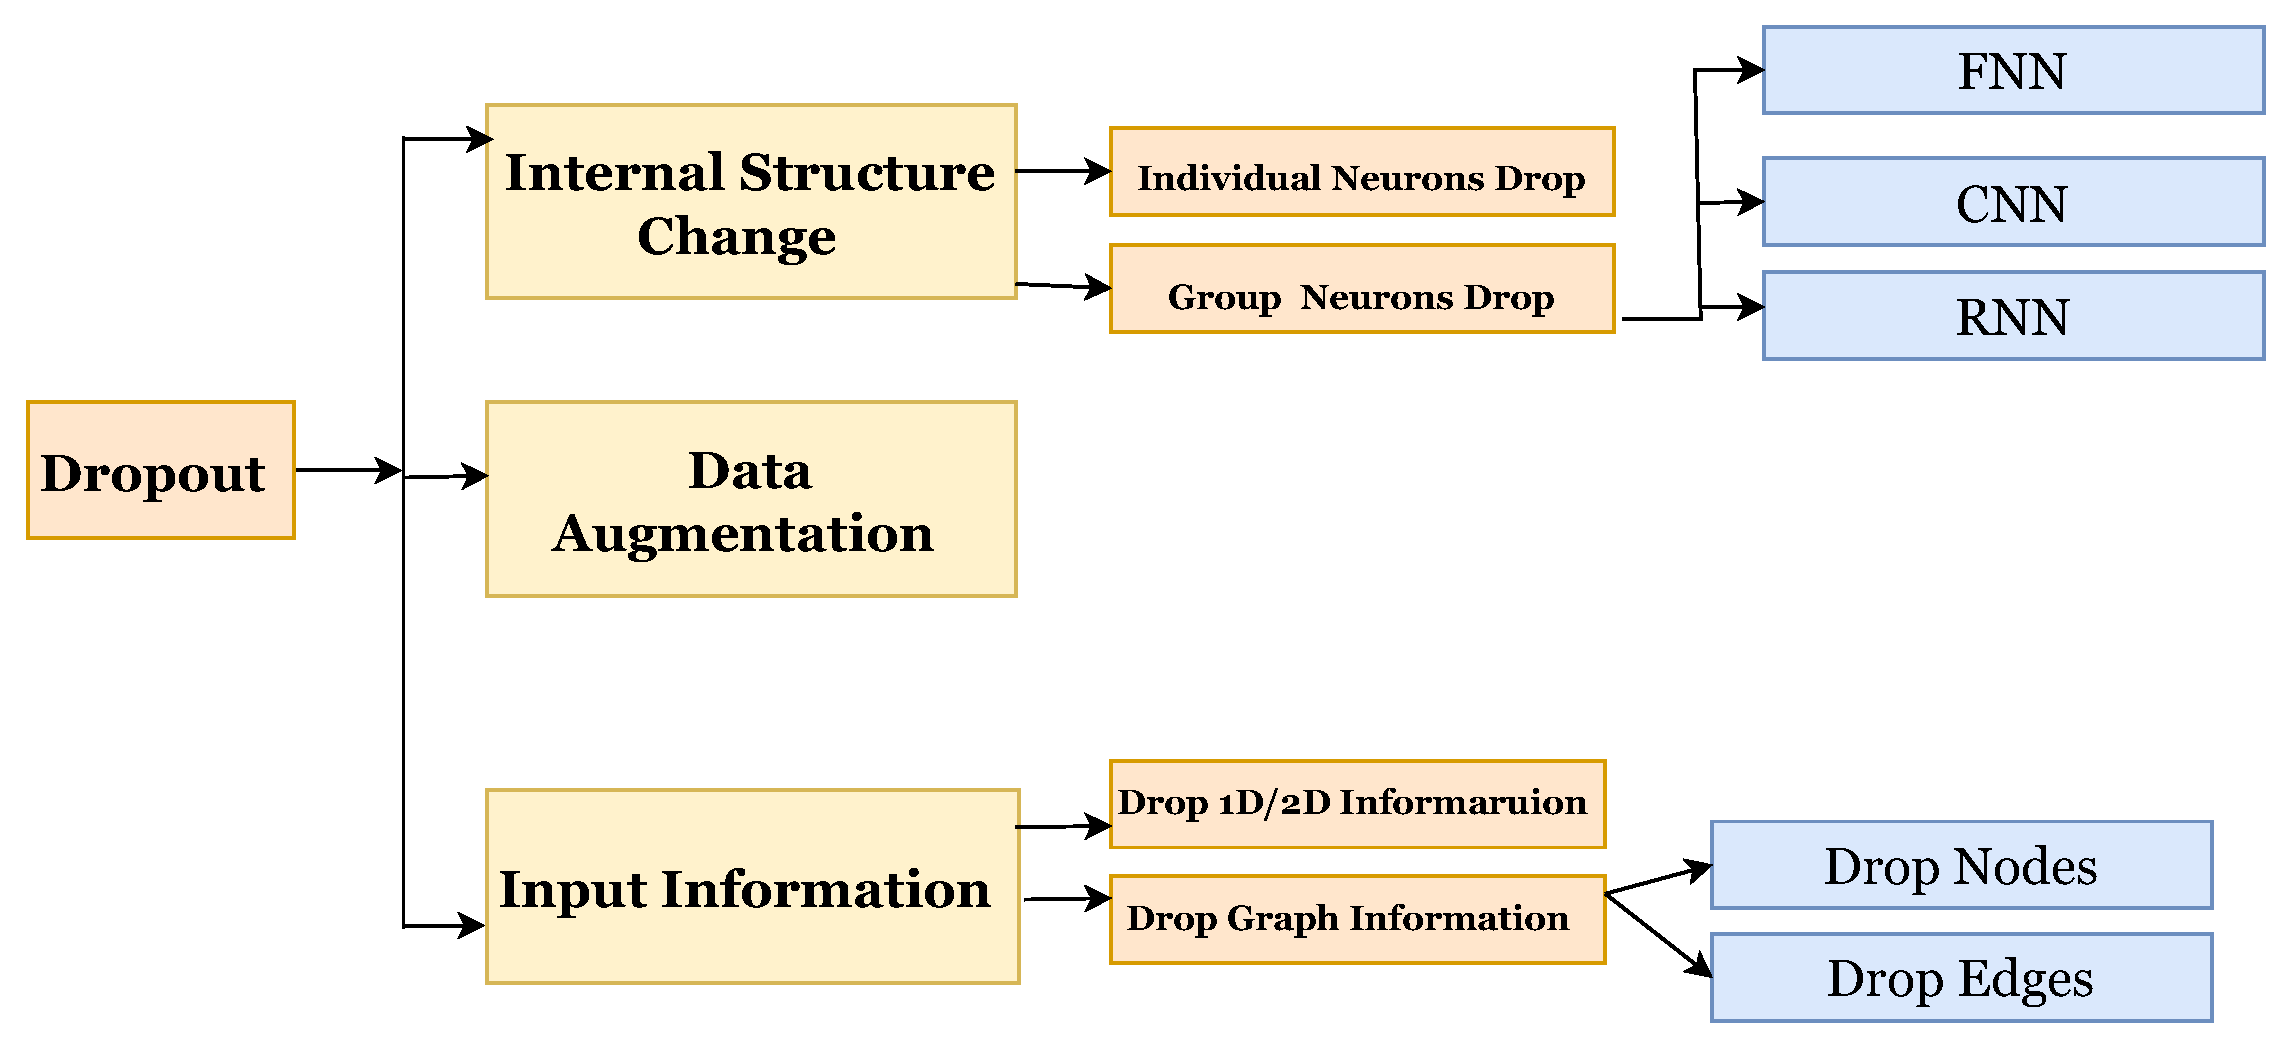

Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Testing data shape: (10000, 784)
Testing labels shape: (10000, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)


Training the model with Batch Normalization and Dropout...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7941 - loss: 0.6813 - val_accuracy: 0.9570 - val_loss: 0.1389
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9222 - loss: 0.2618 - val_accuracy: 0.9672 - val_loss: 0.1051
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9369 - loss: 0.2129 - val_accuracy: 0.9694 - val_loss: 0.1007
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9435 - loss: 0.1893 - val_accuracy: 0.9719 - val_loss: 0.0896
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9476 - loss: 0.1689 - val_accuracy: 0.9748 - val_loss: 0.0847
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9513 - loss: 0.1576 - val_accuracy: 0.9752 - val_loss: 0.0769
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9539 - loss: 0.1492 - val_accuracy: 0.9765 - val_loss: 0.0755
Epoch 8/10
1875/1875 ━━━━━━

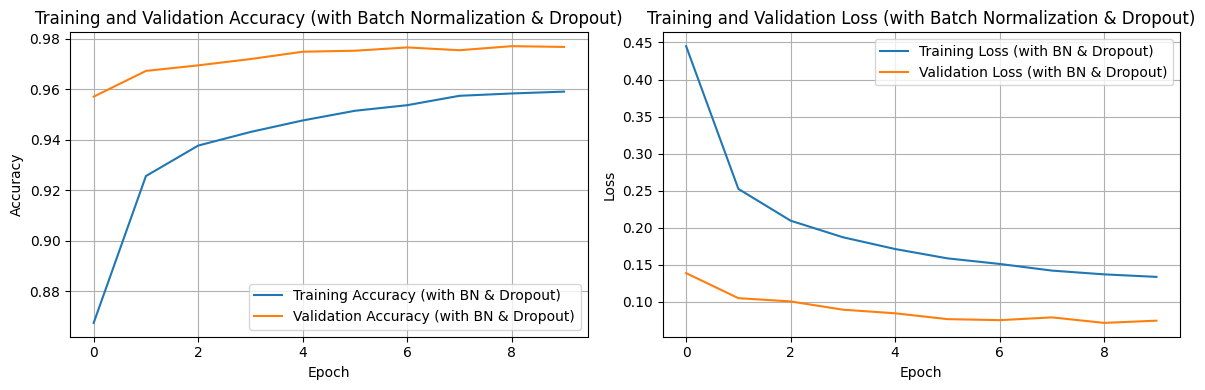

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values from 0-255 to 0-1
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train_one_hot.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test_one_hot.shape}")

# Define the Sequential DNN model with Batch Normalization and Dropout
model_bn_dropout = Sequential([
    # Flatten layer to reshape the input images (28x28) into a 1D vector (784)
    Flatten(input_shape=(28 * 28,)),

    # First Dense layer
    Dense(128),
    # Batch Normalization layer after the dense layer and before activation
    BatchNormalization(),
    # Activation function
    keras.layers.Activation('relu'),
    # Dropout layer after the activation
    # Randomly sets a fraction of neurons to 0 during training
    Dropout(0.3), # Dropout rate of 30%

    # Second Dense layer
    Dense(64),
    # Batch Normalization layer
    BatchNormalization(),
    # Activation function
    keras.layers.Activation('relu'),
    # Dropout layer
    Dropout(0.3), # Dropout rate of 30%

    # Output dense layer with softmax activation for classification
    Dense(num_classes, activation='softmax')
])

# Compile the model
# We use 'adam' optimizer and 'categorical_crossentropy' loss for multi-class classification.
# 'accuracy' is included as a metric to monitor performance.
model_bn_dropout.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Display the model architecture, showing the added layers
model_bn_dropout.summary()

# Train the model
# Batch Normalization and Dropout will be active during training.
epochs = 10
batch_size = 32
print("\nTraining the model with Batch Normalization and Dropout...")
history_bn_dropout = model_bn_dropout.fit(x_train, y_train_one_hot,
                                          epochs=epochs,
                                          batch_size=batch_size,
                                          validation_data=(x_test, y_test_one_hot)) # Use test data for validation

# Evaluate the model on the test set
# Batch Normalization will use global statistics, and Dropout will be inactive.
print("\nEvaluating the model with Batch Normalization and Dropout on the test set:")
loss_bn_dropout, accuracy_bn_dropout = model_bn_dropout.evaluate(x_test, y_test_one_hot, verbose=0)

print(f"Test Loss (with BN and Dropout): {loss_bn_dropout:.4f}")
print(f"Test Accuracy (with BN and Dropout): {accuracy_bn_dropout:.4f}")

# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_bn_dropout.history['accuracy'], label='Training Accuracy (with BN & Dropout)')
plt.plot(history_bn_dropout.history['val_accuracy'], label='Validation Accuracy (with BN & Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (with Batch Normalization & Dropout)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_bn_dropout.history['loss'], label='Training Loss (with BN & Dropout)')
plt.plot(history_bn_dropout.history['val_loss'], label='Validation Loss (with BN & Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (with Batch Normalization & Dropout)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 3.Early Stopping

    * **How it works:** Monitors the model's performance on a separate validation dataset during training. Training is stopped when the performance on the validation set starts to degrade, even if the training loss is still decreasing.
    * **Benefits:** Prevents the model from training for too many epochs and overfitting. It also saves computational resources and simplifies the selection of the number of training epochs.

Early Stopping is a form of regularization used when training Deep Neural Networks (DNNs) to **prevent the model from overfitting the training data**. It's a simple yet effective technique that **monitors the model's performance on a separate validation dataset during the training process** and **stops training when the performance on the validation set starts to degrade.**

**The Problem Early Stopping Addresses: Overfitting**

During the training of a DNN, the model learns to minimize the loss function on the training data. As training progresses over many epochs, the model's performance on the training data typically continues to improve. However, at some point, the model may start to learn the noise and specific details of the training data that do not generalize to new, unseen data. This is known as **overfitting**. When a model is overfitted, its performance on the training data is excellent, but its performance on a separate validation or test dataset deteriorates.

**How Early Stopping Works:**

Early Stopping addresses overfitting by monitoring a chosen metric on a validation set throughout training. The training process continues as long as the performance on the validation set is improving (or not getting worse by a significant margin). When the monitored metric on the validation set stops improving for a specified number of epochs, the Early Stopping mechanism triggers and halts the training.

The idea is that the point where the model's performance on the validation set is best represents the point where the model has learned the underlying patterns well without starting to overfit to the training data.

**Key Parameters for Configuring Early Stopping:**

When implementing Early Stopping, you typically configure the following parameters:

* **`monitor`**: This is the metric that the Early Stopping callback will monitor. Common choices include `'val_loss'` (validation loss) or `'val_accuracy'` (validation accuracy). For metrics where lower is better (like loss), the goal is to stop when the metric stops decreasing. For metrics where higher is better (like accuracy), the goal is to stop when the metric stops increasing.
* **`patience`**: This is the **number of epochs with no improvement** in the monitored metric after which training will be stopped. A higher `patience` value means the training will wait longer for an improvement before stopping, which can be useful if the validation metric fluctuates. However, a very high `patience` might still lead to some degree of overfitting.
* **`min_delta`**: This parameter sets a minimum threshold for the change in the monitored metric to be considered an improvement. Changes smaller than `min_delta` will be considered no improvement. This helps to avoid stopping too early due to tiny, insignificant fluctuations in the validation metric.
* **`mode`**: This specifies whether the monitored metric is expected to decrease (`'min'`) or increase (`'max'`). For example, if monitoring `'val_loss'`, you would set `mode='min'`; if monitoring `'val_accuracy'`, you would set `mode='max'`. The default is often `'auto'`, where the mode is inferred from the name of the monitored metric.
* **`restore_best_weights`**: If set to `True`, this option will restore the model's weights to the values they had at the epoch with the best performance on the monitored metric when training is stopped. This is highly recommended as the model's performance might have slightly degraded in the epochs just before stopping.

**Benefits of Using Early Stopping:**

* **Prevents Overfitting:** This is the primary benefit, leading to a model that generalizes better to unseen data.
* **Saves Training Time and Resources:** By stopping training early when further improvement is unlikely, Early Stopping avoids unnecessary computation.
* **Simplifies Hyperparameter Tuning:** It removes the need to manually find the optimal number of epochs, allowing you to set a large number of epochs and let Early Stopping determine the appropriate stopping point.
* **Improved Model Performance:** By selecting the model state before overfitting occurs, Early Stopping often results in a model with better performance on the validation and test sets.

In practice, Early Stopping is implemented as a callback during the model training process in deep learning frameworks like Keras. You define the callback with the desired parameters and pass it to the `fit()` method.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess the MNIST dataset
# The MNIST dataset is a good choice for examples as it's readily available
# and suitable for a basic DNN classification task.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values from 0-255 to 0-1
# This is a standard preprocessing step for image data.
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Convert labels to one-hot encoding
# Necessary for using categorical_crossentropy loss.
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)


In [4]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train_one_hot.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test_one_hot.shape}")

Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Testing data shape: (10000, 784)
Testing labels shape: (10000, 10)


In [5]:
# Define the Sequential DNN model with Batch Normalization and Dropout
model_full = Sequential([
    # Flatten layer to reshape the input images (28x28) into a 1D vector (784)
    Flatten(input_shape=(28 * 28,)),

    # First Dense layer with 128 neurons
    Dense(128),
    # Batch Normalization layer: Stabilizes training and allows higher learning rates.
    # Placed after the linear transformation (Dense) and before the activation.
    BatchNormalization(),
    # Activation function: Introduces non-linearity.
    keras.layers.Activation('relu'),
    # Dropout layer: Randomly sets a fraction of neurons to 0 during training to prevent overfitting.
    # Placed after the activation.
    Dropout(0.3), # Dropout rate of 30%

    # Second Dense layer with 64 neurons
    Dense(64),
    # Batch Normalization layer
    BatchNormalization(),
    # Activation function
    keras.layers.Activation('relu'),
    # Dropout layer
    Dropout(0.3), # Dropout rate of 30%

    # Output dense layer with 10 neurons (for 10 classes) and softmax activation
    # Softmax ensures the output is a probability distribution over the classes.
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile the model
# Using 'adam' optimizer and 'categorical_crossentropy' loss for multi-class classification.
# 'accuracy' is monitored as a performance metric.
model_full.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


In [7]:
# Define the Early Stopping callback
# This callback monitors a metric (validation loss in this case) and stops training
# if it doesn't improve for a specified number of epochs ('patience').
early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to monitor (validation loss)
    patience=5,         # Number of epochs with no improvement to wait before stopping
    mode='min',         # We want to minimize the validation loss
    verbose=1,          # Print a message when Early Stopping triggers
    restore_best_weights=True # Restore the model weights from the epoch with the best monitored value
)


In [8]:
# Display the model architecture, showing all the added layers
model_full.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [9]:
# Train the model with Batch Normalization, Dropout, and Early Stopping
# We set a relatively large number of epochs (e.g., 50), but Early Stopping will
# likely stop the training much earlier based on the validation performance.
epochs = 50
batch_size = 32
print("\nTraining the model with Batch Normalization, Dropout, and Early Stopping...")
history_full = model_full.fit(x_train, y_train_one_hot,
                               epochs=epochs,
                               batch_size=batch_size,
                               validation_data=(x_test, y_test_one_hot), # Use test data for validation
                               callbacks=[early_stopping]) # Pass the EarlyStopping callback here




Training the model with Batch Normalization, Dropout, and Early Stopping...
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7906 - loss: 0.6888 - val_accuracy: 0.9538 - val_loss: 0.1488
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9194 - loss: 0.2672 - val_accuracy: 0.9656 - val_loss: 0.1151
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9341 - loss: 0.2202 - val_accuracy: 0.9703 - val_loss: 0.0978
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9420 - loss: 0.1887 - val_accuracy: 0.9732 - val_loss: 0.0877
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9488 - loss: 0.1689 - val_accuracy: 0.9747 - val_loss: 0.0823
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9500 - loss: 0.1589 - val_accuracy: 0.9762 - val_loss: 0.0789
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9547 - loss: 0.1481 - val_accuracy: 0.9768 - val_loss: 0.0709
Epoch 

In [10]:
# Evaluate the final model on the test set
# The model's weights will be the best ones found during training due to restore_best_weights=True.
print("\nEvaluating the final model on the test set:")
loss_full, accuracy_full = model_full.evaluate(x_test, y_test_one_hot, verbose=0)



Evaluating the final model on the test set:


In [11]:
print(f"Test Loss (with BN, Dropout, ES): {loss_full:.4f}")
print(f"Test Accuracy (with BN, Dropout, ES): {accuracy_full:.4f}")



Test Loss (with BN, Dropout, ES): 0.0628
Test Accuracy (with BN, Dropout, ES): 0.9808


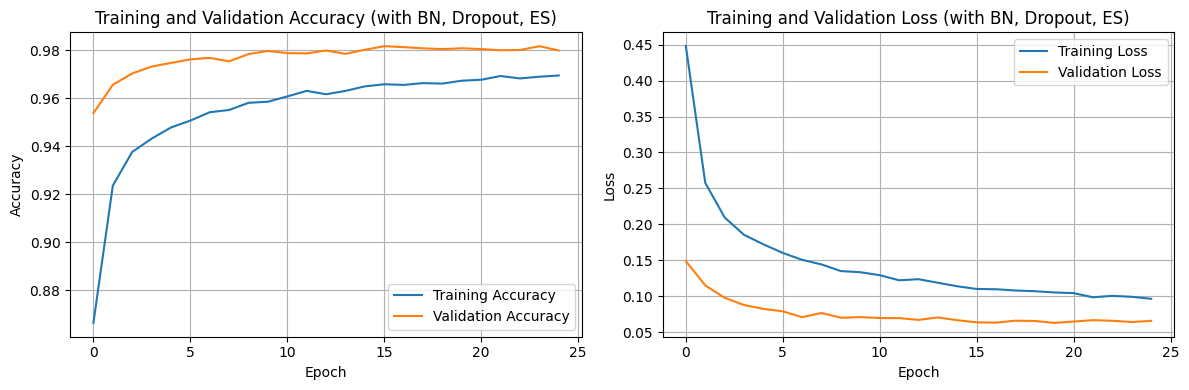

In [12]:
# Plotting training and validation accuracy and loss over the epochs trained
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_full.history['accuracy'], label='Training Accuracy')
plt.plot(history_full.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (with BN, Dropout, ES)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_full.history['loss'], label='Training Loss')
plt.plot(history_full.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (with BN, Dropout, ES)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 4.L1 and L2 Regularization (Weight Decay)

* **How it works:** These techniques add a penalty to the loss function based on the magnitude of the model's weights.

  - **L1 Regularization (Lasso):** Adds a penalty proportional to the absolute value of the weights - ($\lambda \sum |w|$)
    - This can encourage sparsity in the weights, effectively driving some weights to zero and performing feature selection.

  - **L2 Regularization (Ridge or Weight Decay):** Adds a penalty proportional to the square of the weights - ($ \lambda \sum w^2 $)
    - This encourages the weights to be small, preventing any single weight from becoming too large and dominating the learning.


* **Benefits:** Helps to keep weights small, making the model less sensitive to small changes in input and reducing the likelihood of overfitting. L1 can also help with feature selection.

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [14]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values from 0-255 to 0-1
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0


In [15]:
# Convert labels to one-hot encoding
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train_one_hot.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test_one_hot.shape}")


Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Testing data shape: (10000, 784)
Testing labels shape: (10000, 10)


In [16]:
# Define the Sequential DNN model with L1 and L2 regularization
model_l1_l2 = Sequential([
    # Flatten layer to reshape the input images (28x28) into a 1D vector (784)
    Flatten(input_shape=(28 * 28,)),

    # First Dense layer with L1 and L2 kernel regularization
    Dense(128, activation='relu',
          kernel_regularizer=l1_l2(l1=0.001, l2=0.001)), # Apply L1 and L2 to weights

    # Second Dense layer with L1 and L2 kernel regularization
    Dense(64, activation='relu',
          kernel_regularizer=l1_l2(l1=0.001, l2=0.001)), # Apply L1 and L2 to weights

    # Output dense layer with softmax activation
    Dense(num_classes, activation='softmax')
])


In [17]:
# Compile the model
# The regularization penalties are automatically added to the loss function during compilation.
model_l1_l2.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


In [18]:
# Display the model architecture
model_l1_l2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
# The training process will now include the regularization penalties in the loss optimization.
epochs = 10
batch_size = 32
print("\nTraining the model with L1 and L2 Regularization...")
history_l1_l2 = model_l1_l2.fit(x_train, y_train_one_hot,
                                epochs=epochs,
                                batch_size=batch_size,
                                validation_data=(x_test, y_test_one_hot)) # Use test data for validation




Training the model with L1 and L2 Regularization...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8467 - loss: 1.8911 - val_accuracy: 0.9208 - val_loss: 0.6487
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9210 - loss: 0.6165 - val_accuracy: 0.9270 - val_loss: 0.5259
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9284 - loss: 0.5236 - val_accuracy: 0.9320 - val_loss: 0.4743
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9318 - loss: 0.4771 - val_accuracy: 0.9328 - val_loss: 0.4512
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9364 - loss: 0.4549 - val_accuracy: 0.9391 - val_loss: 0.4239
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9364 - loss: 0.4394 - val_accuracy: 0.9415 - val_loss: 0.4193
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9391 - loss: 0.4224 - val_accuracy: 0.9384 - val_loss: 0.4199
Epoch 8/10
1875/1875 ━━━━━━━━━

In [20]:
# Evaluate the model on the test set
print("\nEvaluating the model with L1 and L2 Regularization on the test set:")
loss_l1_l2, accuracy_l1_l2 = model_l1_l2.evaluate(x_test, y_test_one_hot, verbose=0)

print(f"Test Loss (with L1/L2): {loss_l1_l2:.4f}")
print(f"Test Accuracy (with L1/L2): {accuracy_l1_l2:.4f}")



Evaluating the model with L1 and L2 Regularization on the test set:
Test Loss (with L1/L2): 0.4086
Test Accuracy (with L1/L2): 0.9374


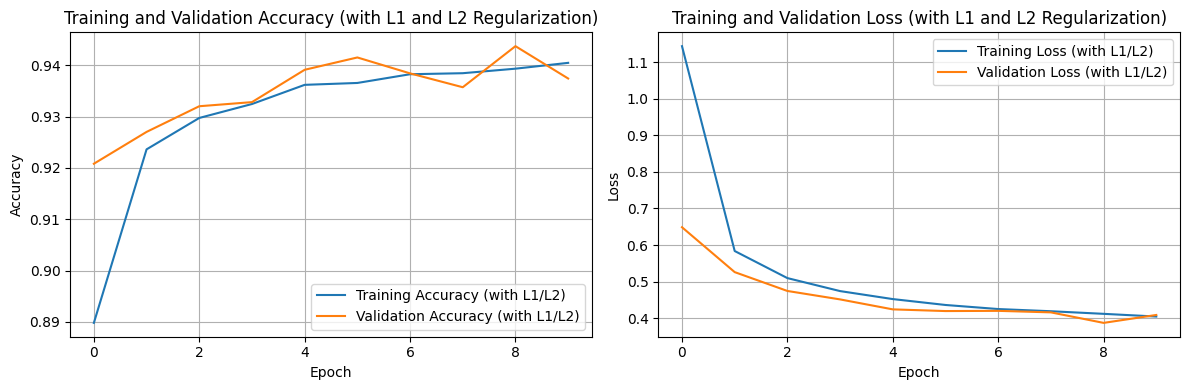

In [21]:
# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_l1_l2.history['accuracy'], label='Training Accuracy (with L1/L2)')
plt.plot(history_l1_l2.history['val_accuracy'], label='Validation Accuracy (with L1/L2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (with L1 and L2 Regularization)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_l1_l2.history['loss'], label='Training Loss (with L1/L2)')
plt.plot(history_l1_l2.history['val_loss'], label='Validation Loss (with L1/L2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (with L1 and L2 Regularization)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 5.Data Augmentation

* **How it works:** Although not strictly an internal regularization technique applied to the model weights, Data Augmentation is a crucial method to combat overfitting by artificially increasing the size and diversity of the training dataset. This is done by applying random transformations to the existing training data (e.g., rotation, scaling, cropping, flipping, color jittering for images).
* **Benefits:** Exposes the model to a wider variety of data points, making it more robust and less likely to overfit to the specific characteristics of the original training set.



Here's a more detailed look at how Dropout works:



# Types in DNN
1. SEquential
2. API









Regualization Techniques




Hyperparameter tuning

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(input_dim = 2, units = 10, activation='relu', kernel_initializer='uniform'))

model.add(Dense(units = 20, activation='relu', kernel_initializer='uniform'))

model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))

# optimier, loss, metric for compling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train,Y_train,batch_size=500, epochs=10)

model.evaluate(X_test,Y_test)



# Reference

- https://shahaab-co.com/mag/en-articles/activation-functions-in-deep-learning/

- https://shahaab-co.com/mag/en-articles/weight-initialization-in-deep-learning/

- https://intellipaat.com/blog/cost-function-in-machine-learning/

- https://intellipaat.com/blog/cost-function-in-machine-learning/

- https://keras.io/api/optimizers/

- https://keras.io/api/layers/